In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#1. XỬ LÝ DỮ LIỆU

In [2]:
#loading data
link_data = 'https://drive.google.com/file/d/1N0av5RojSGObNsv9C4O5NUPYGnCW8ULQ/view?usp=drive_link'
id = link_data.split('/')[-2]
print(id)
df = pd.read_csv('https://drive.google.com/u/0/uc?id=1N0av5RojSGObNsv9C4O5NUPYGnCW8ULQ&export=download'+ link_data.split('/')[-2])
df.head()

1N0av5RojSGObNsv9C4O5NUPYGnCW8ULQ


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df = df[df.columns[:-2]]
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [ ]:
df.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [4]:
df.Attrition_Flag = df.Attrition_Flag.replace({"Existing Customer": 0, "Attrited Customer": 1})
df.Attrition_Flag

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df.CLIENTNUM.nunique()

10127

In [ ]:
corr = df[['Attrition_Flag','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,1.000000,0.018203,0.018991,0.013687,-0.150005,0.152449,0.204491,-0.023873,-0.263053,-0.000285,-0.131063,-0.168598,-0.371403,-0.290054,-0.178410
Customer_Age,0.018203,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.018991,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.013687,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.150005,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.152449,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.204491,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,-0.023873,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,-0.263053,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,-0.000285,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


Các column hầu như không có tương quan mạnh đến nhãn Attrition_Flag

In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
len(df.columns)


21

In [ ]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

#2. PHÂN THÍCH DỮ LIỆU

In [5]:
colors = ['#798f9b', '#bbcbcd']

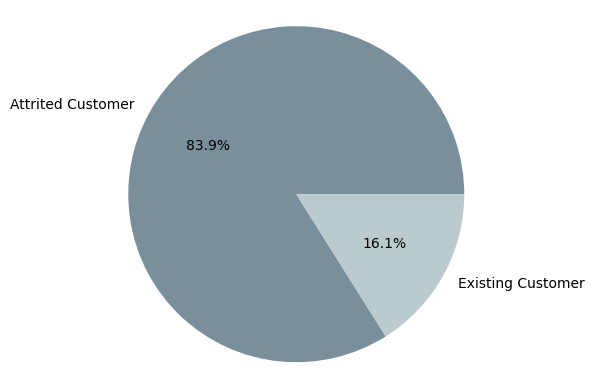

In [ ]:
ax =df.value_counts(df.Attrition_Flag)
plt.pie(ax, labels=['Attrited Customer','Existing Customer'], autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.show()

In [ ]:
plot = sns.pairplot(df, hue='Attrition_Flag')
plot.fig.suptitle('Feature Relationship')

Output hidden; open in https://colab.research.google.com to view.

#2.1. CÁC YẾU TỐ NHÂN KHẨU HỌC




In [6]:
churn_df = df[df['Attrition_Flag'] == 1]
not_churn_df = df[df['Attrition_Flag'] == 0]

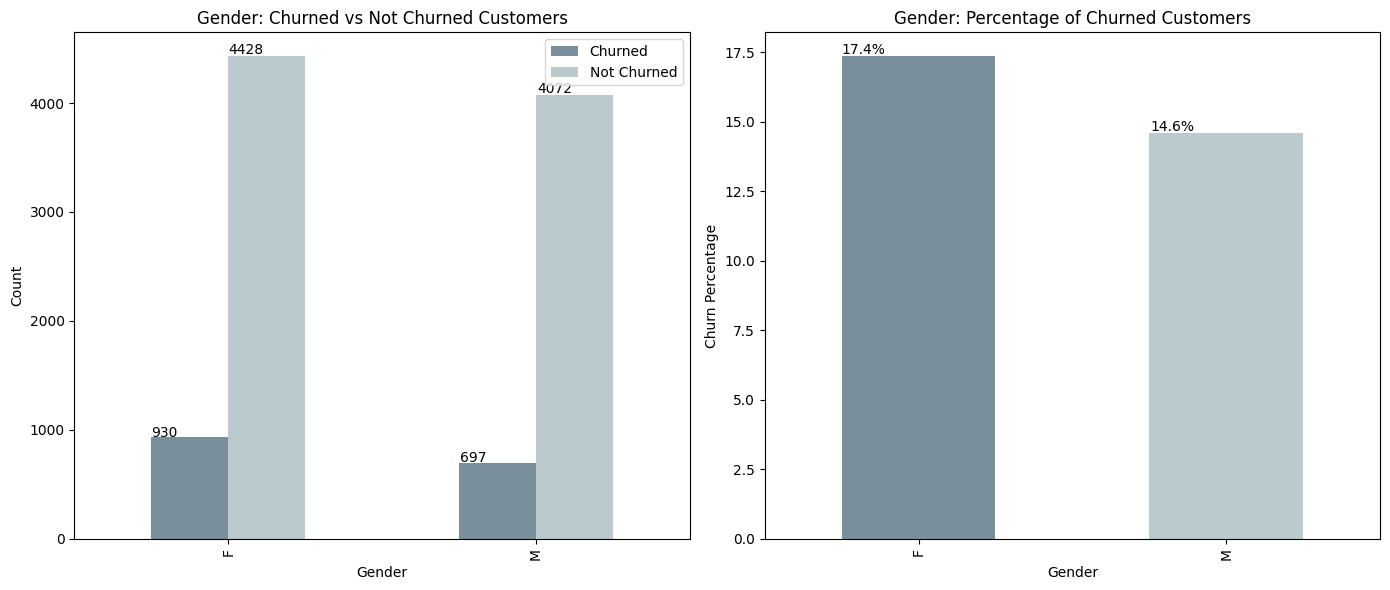

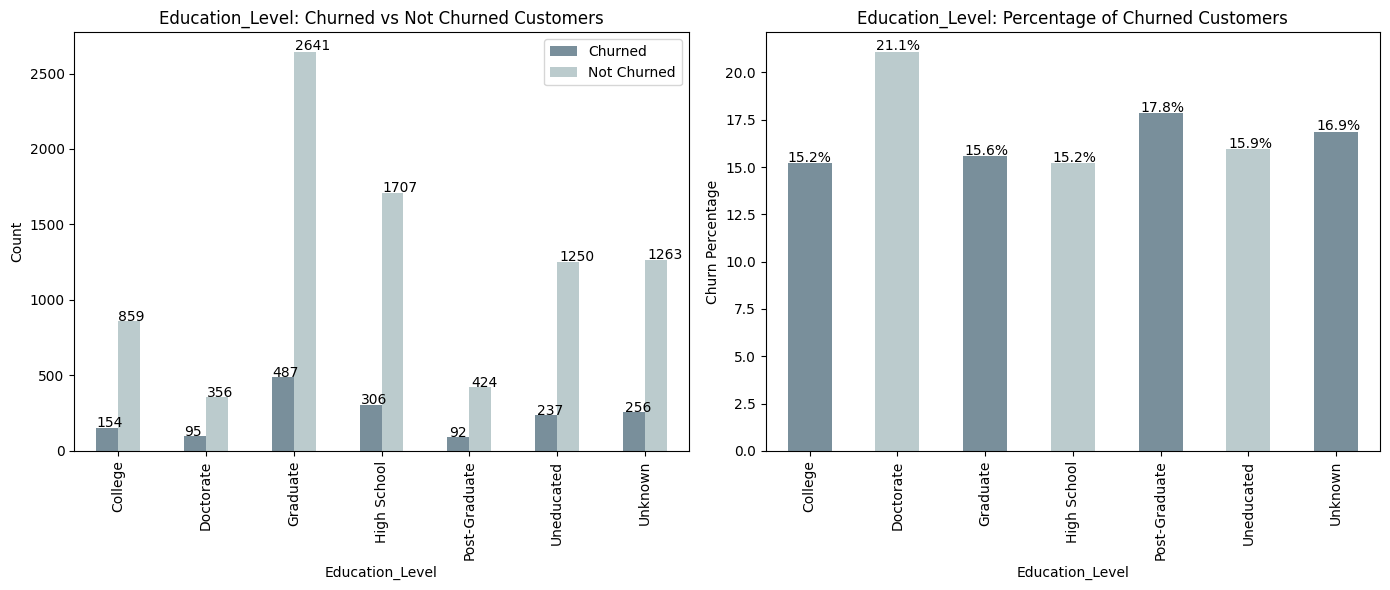

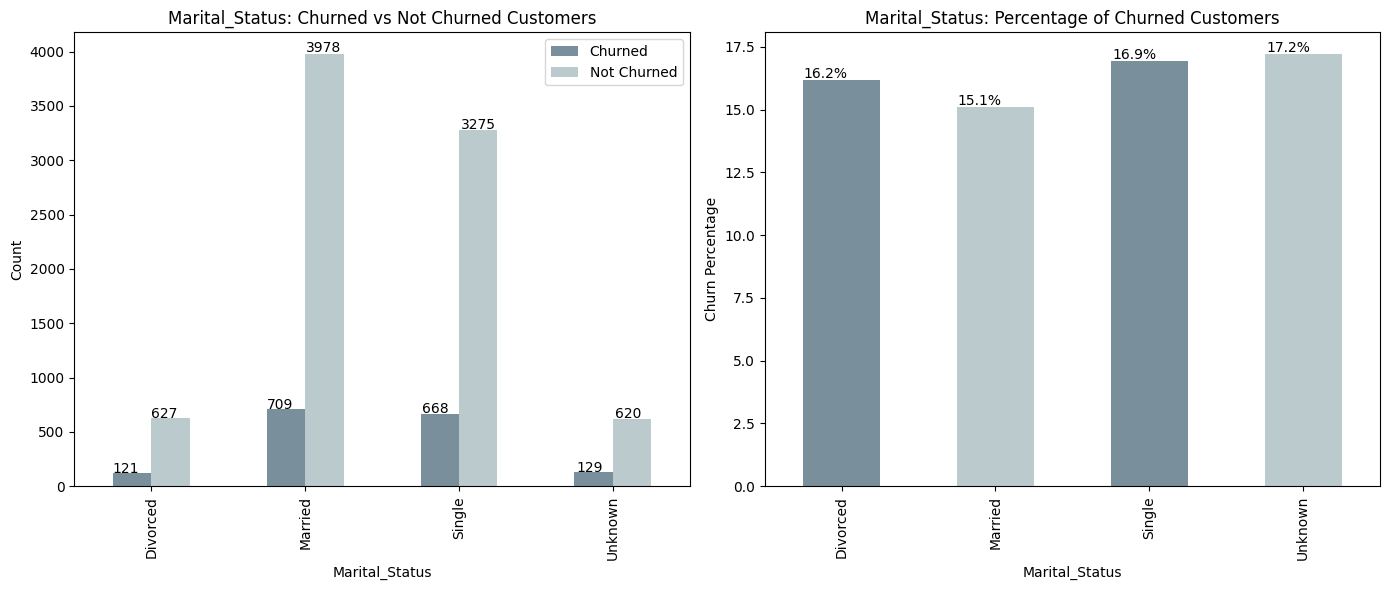

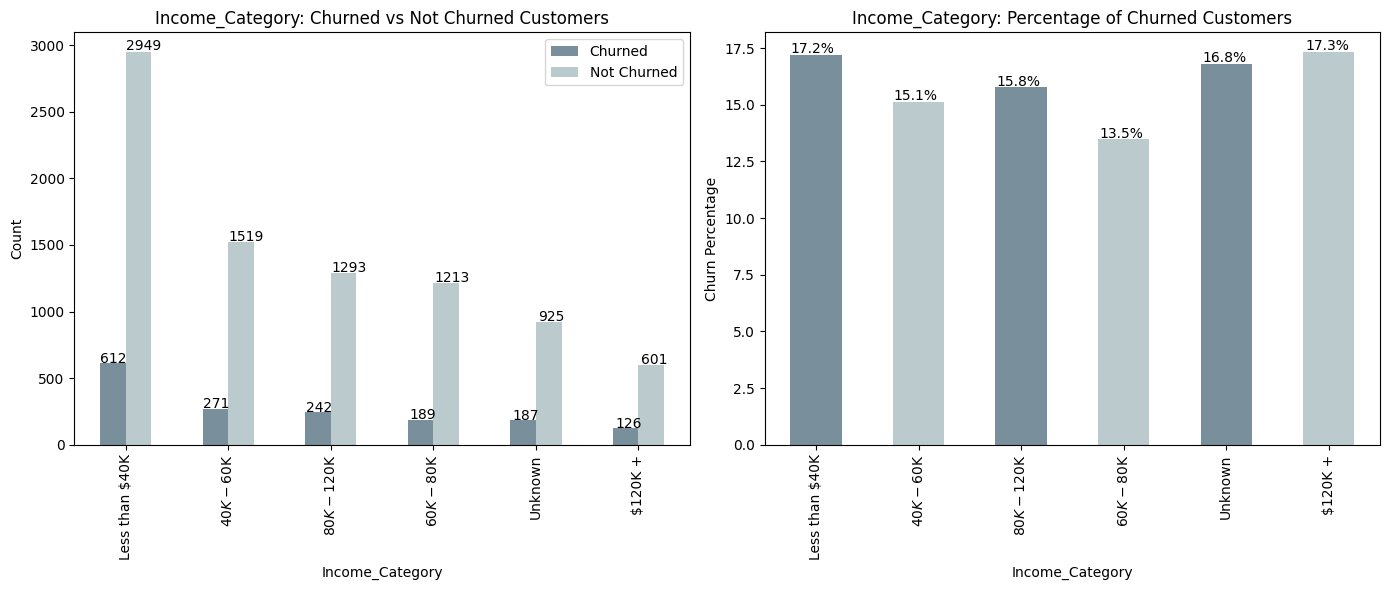

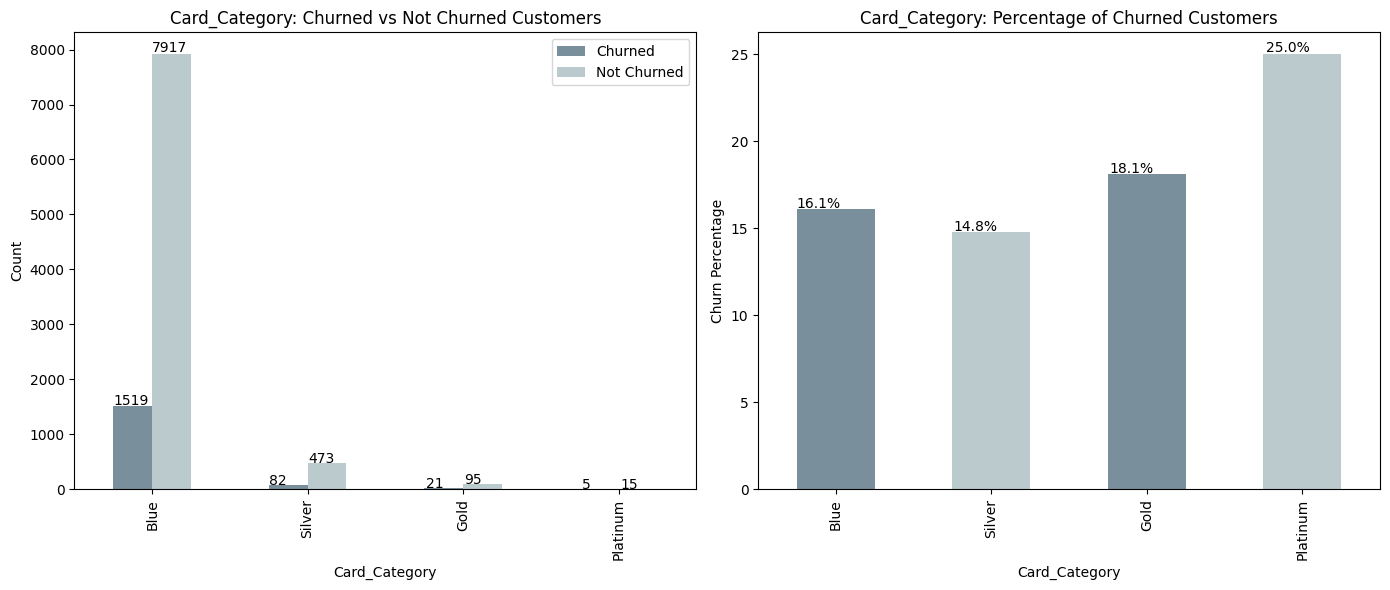

In [ ]:
columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for column in columns:
    churn_counts = churn_df[column].value_counts()
    not_churn_counts = not_churn_df[column].value_counts()

    combined_counts = pd.DataFrame({
        'Churned': churn_counts,
        'Not Churned': not_churn_counts
    }).fillna(0)

    combined_counts['Total'] = combined_counts['Churned'] + combined_counts['Not Churned']
    combined_counts['Churned_Percentage'] = (combined_counts['Churned'] / combined_counts['Total']) * 100

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    ax1 = combined_counts[['Churned', 'Not Churned']].plot(kind='bar', ax=axes[0], color=colors)
    ax1.set_title(f'{column}: Churned vs Not Churned Customers')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Count')

    for p in ax1.patches:
        ax1.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

    ax2 = combined_counts['Churned_Percentage'].plot(kind='bar', ax=axes[1], color=colors)
    ax2.set_title(f'{column}: Percentage of Churned Customers')
    ax2.set_xlabel(column)
    ax2.set_ylabel('Churn Percentage')

    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.tight_layout()
    plt.show()


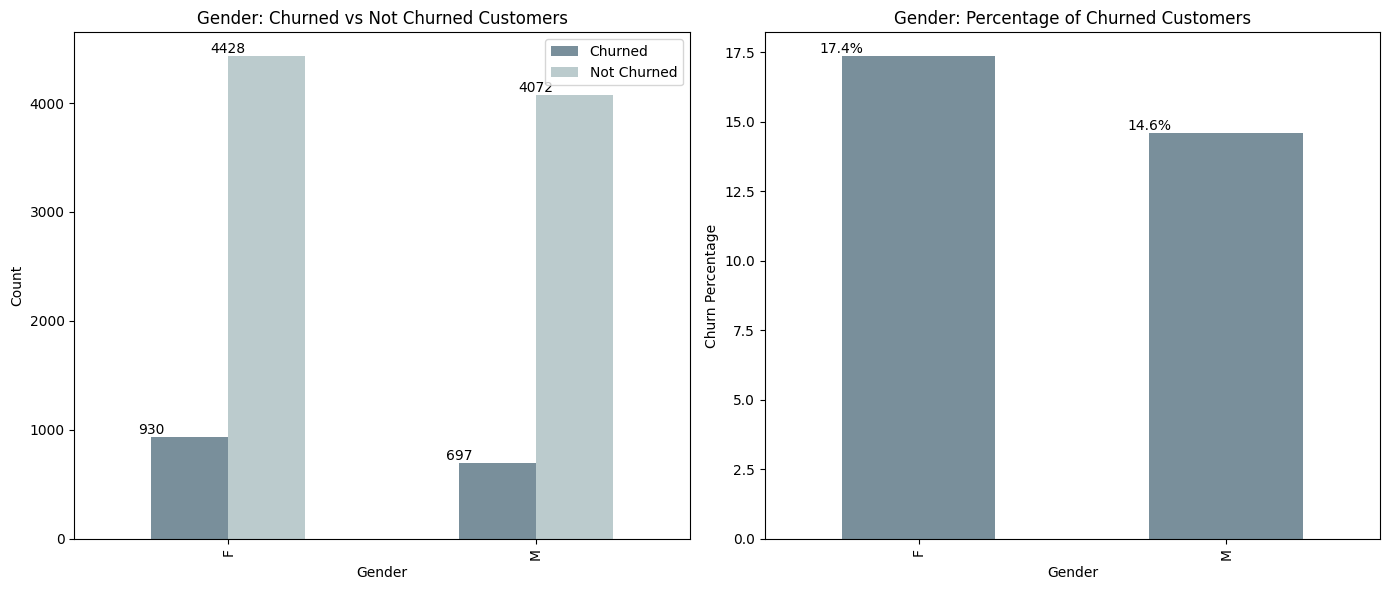

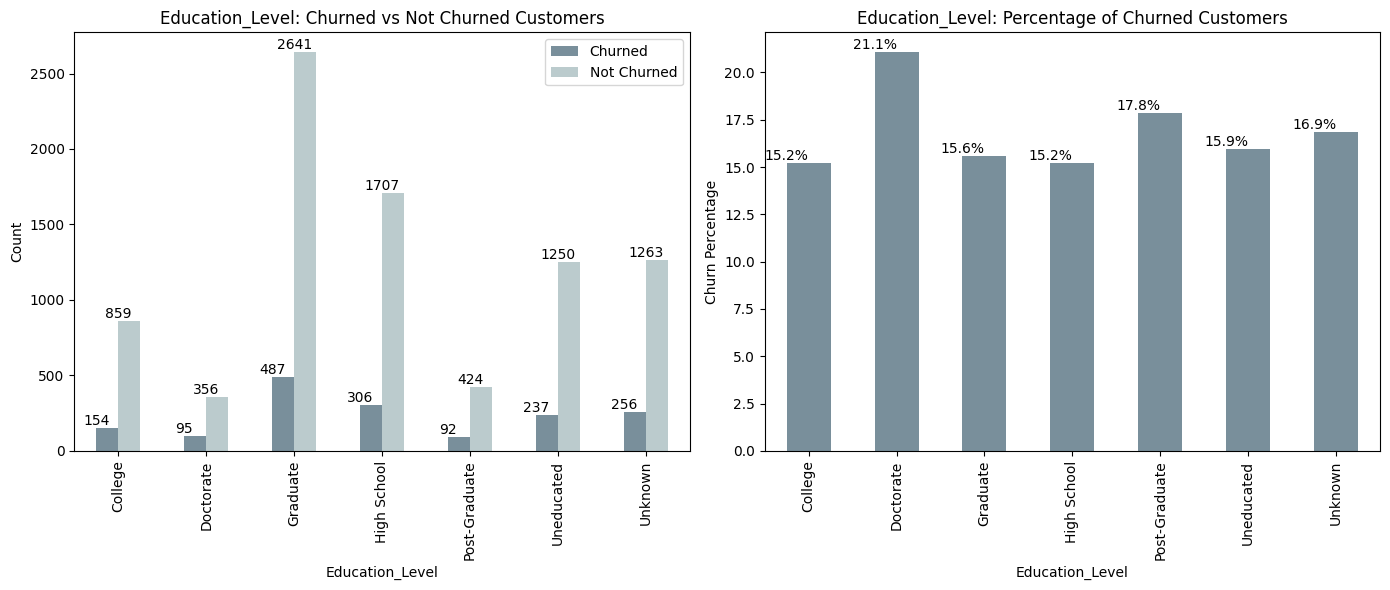

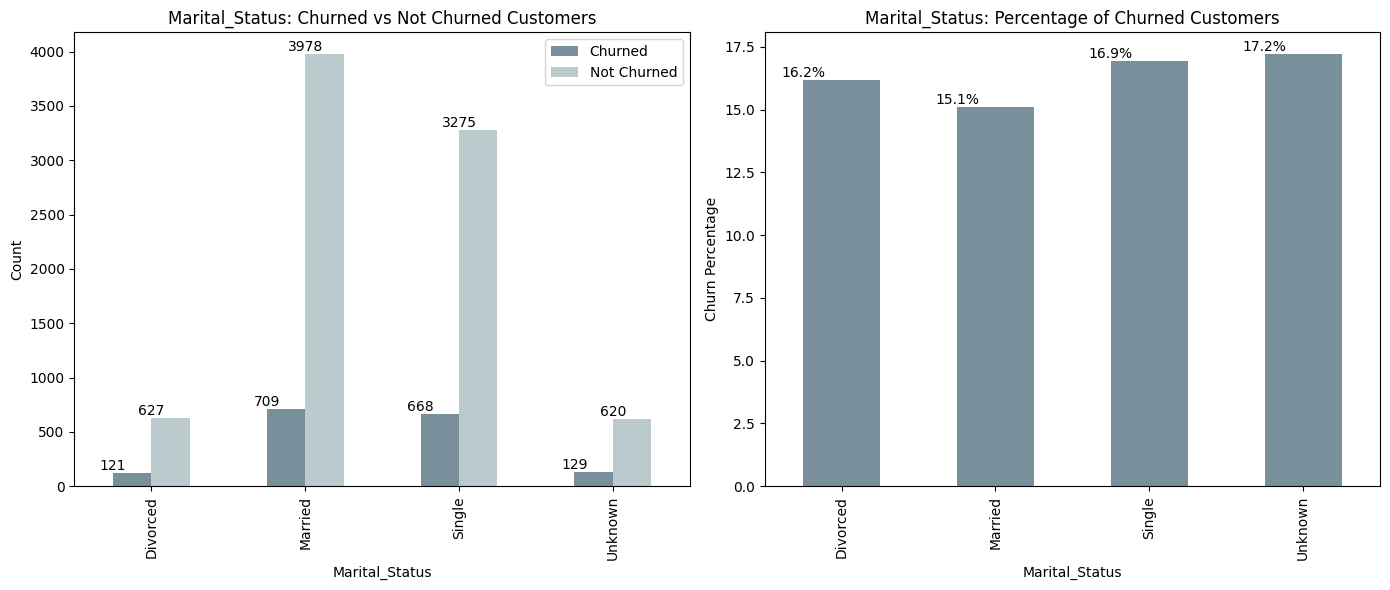

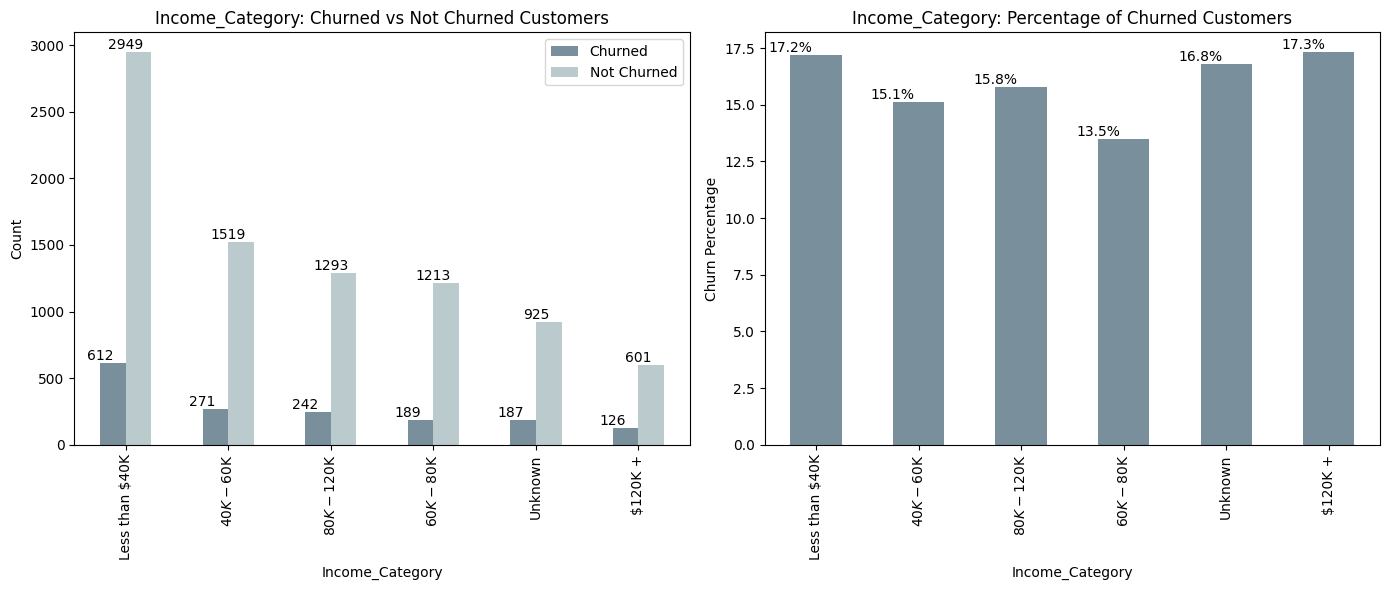

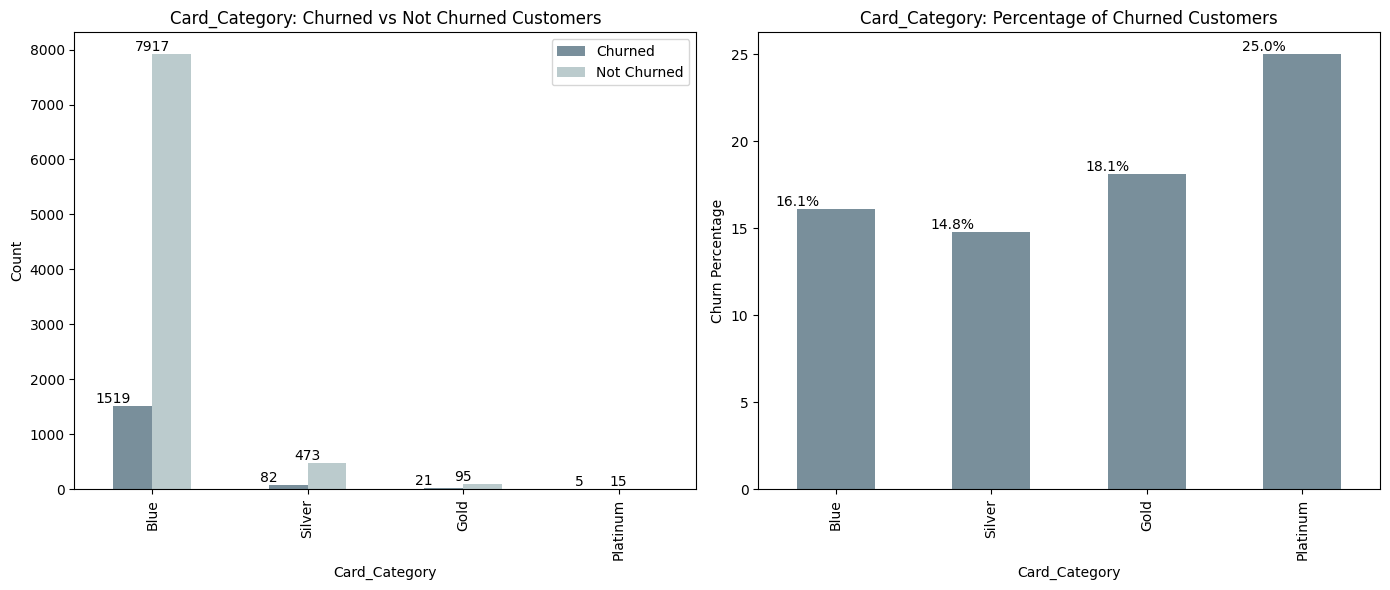

In [ ]:

columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for column in columns:
    churn_counts = churn_df[column].value_counts()
    not_churn_counts = not_churn_df[column].value_counts()

    combined_counts = pd.DataFrame({
        'Churned': churn_counts,
        'Not Churned': not_churn_counts
    }).fillna(0)

    combined_counts['Total'] = combined_counts['Churned'] + combined_counts['Not Churned']
    combined_counts['Churned_Percentage'] = (combined_counts['Churned'] / combined_counts['Total']) * 100

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    ax1 = combined_counts[['Churned', 'Not Churned']].plot(kind='bar', ax=axes[0], color=colors)
    ax1.set_title(f'{column}: Churned vs Not Churned Customers')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Count')

    for p in ax1.patches:
        ax1.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()), ha='center', va='bottom')

    ax2 = combined_counts['Churned_Percentage'].plot(kind='bar', ax=axes[1], color=colors[0])
    ax2.set_title(f'{column}: Percentage of Churned Customers')
    ax2.set_xlabel(column)
    ax2.set_ylabel('Churn Percentage')

    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.1f}%', (p.get_x(), p.get_height()), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

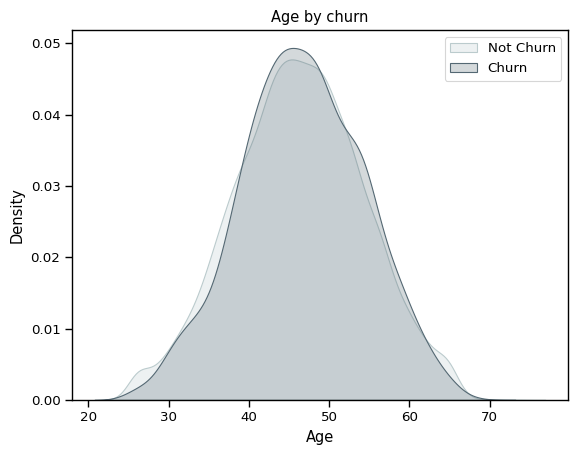

In [7]:
import seaborn as sns

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Customer_Age[(df["Attrition_Flag"] == 0) ], color="#bbcbcd", fill = True);
ax = sns.kdeplot(df.Customer_Age[(df["Attrition_Flag"] == 1) ], color="#546873", fill = True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Age');
ax.set_title('Age by churn');

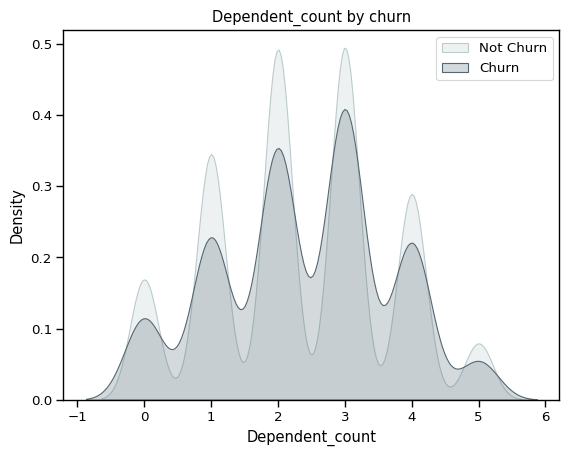

In [8]:


sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Dependent_count[(df["Attrition_Flag"] == 0) ], color="#bbcbcd", fill = True);
ax = sns.kdeplot(df.Dependent_count[(df["Attrition_Flag"] == 1) ], color="#546873", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Dependent_count');
ax.set_title('Dependent_count by churn');

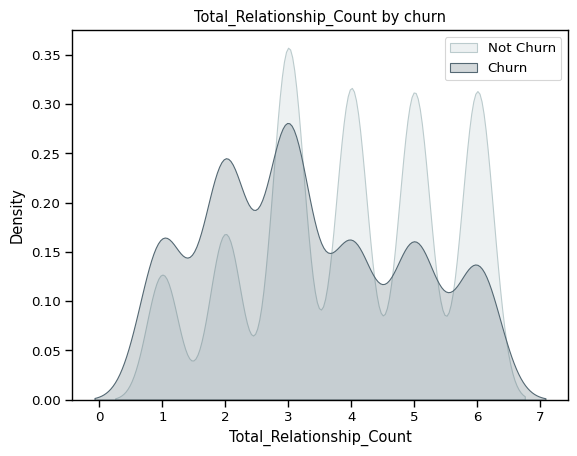

In [9]:

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Total_Relationship_Count[(df["Attrition_Flag"] == 0) ], color="#bbcbcd", fill = True);
ax = sns.kdeplot(df.Total_Relationship_Count[(df["Attrition_Flag"] == 1) ], color="#546873", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total_Relationship_Count');
ax.set_title('Total_Relationship_Count by churn');

Có nhiều sản phẩm tỉ lệ rời bỏ sẽ thấp hơn

#2.2. CÁC YẾU TỐ LIÊN QUAN ĐẾN TÍN DỤNG

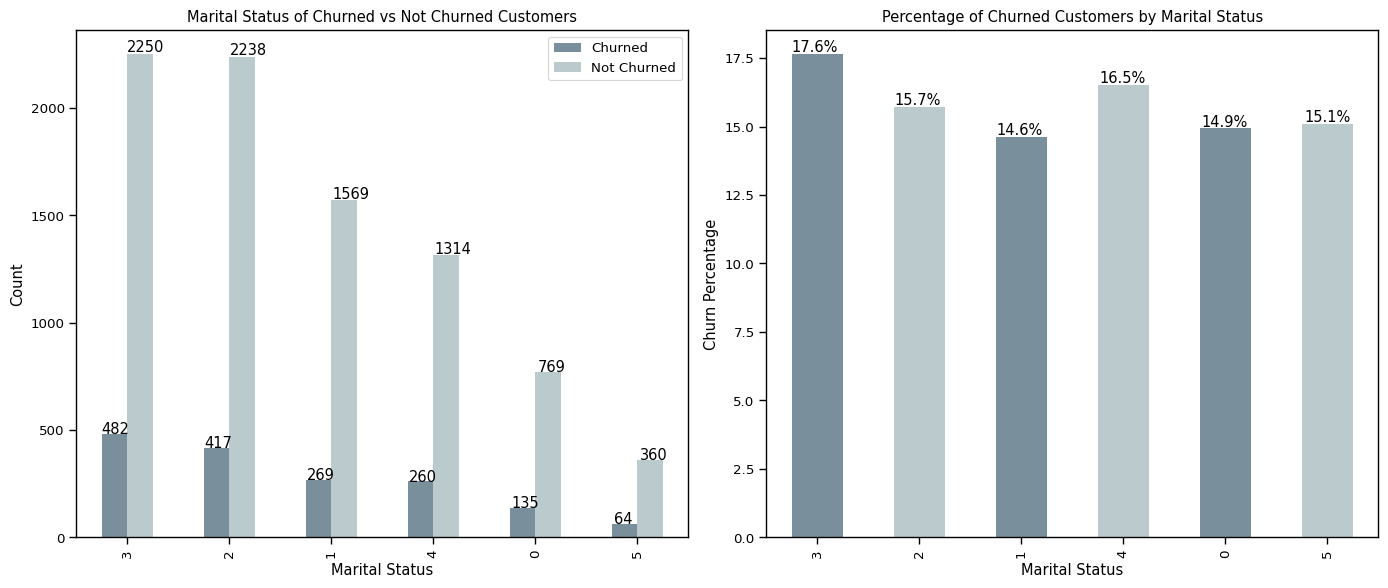

In [ ]:

churn_counts = churn_df['Dependent_count'].value_counts()
not_churn_counts = not_churn_df['Dependent_count'].value_counts()

combined_counts = pd.DataFrame({
    'Churned': churn_counts,
    'Not Churned': not_churn_counts
}).fillna(0)

combined_counts['Total'] = combined_counts['Churned'] + combined_counts['Not Churned']
combined_counts['Churned_Percentage'] = (combined_counts['Churned'] / combined_counts['Total']) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ax1 = combined_counts[['Churned', 'Not Churned']].plot(kind='bar', ax=axes[0], color=colors)
ax1.set_title('Marital Status of Churned vs Not Churned Customers')
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Count')

for p in ax1.patches:
    ax1.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

ax2 = combined_counts['Churned_Percentage'].plot(kind='bar', ax=axes[1], color=colors)
ax2.set_title('Percentage of Churned Customers by Marital Status')
ax2.set_xlabel('Marital Status')
ax2.set_ylabel('Churn Percentage')

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()
plt.show()


tỉ lệ KH rời bỏ dựa vào tình trạng hôn nhân hầu như là như nhau

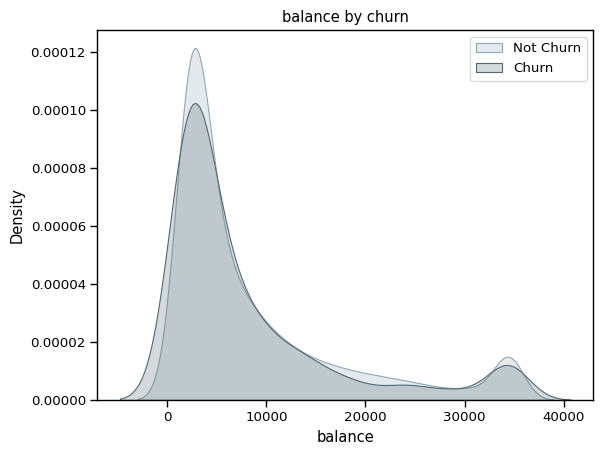

In [10]:


sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Credit_Limit[(df["Attrition_Flag"] == 0) ], color="#91a8b4", fill = True);
ax = sns.kdeplot(df.Credit_Limit[(df["Attrition_Flag"] == 1) ], color="#546873", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('balance');
ax.set_title('balance by churn');

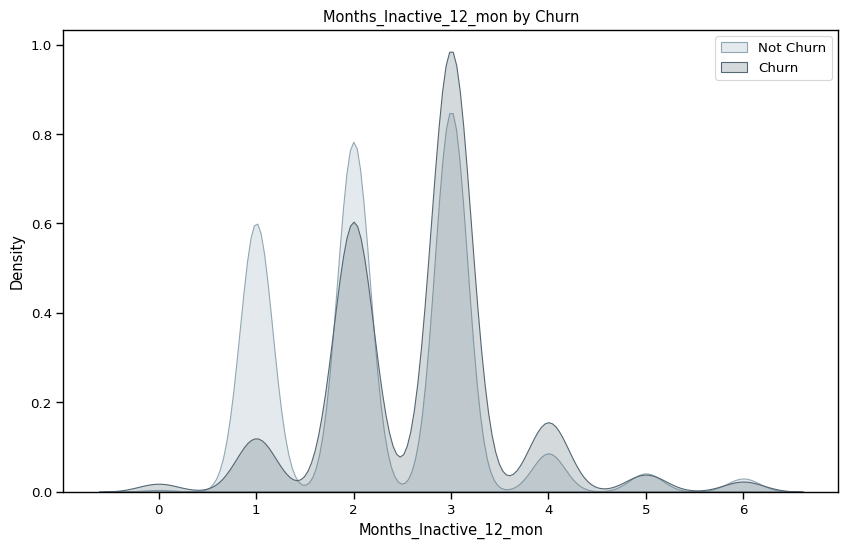

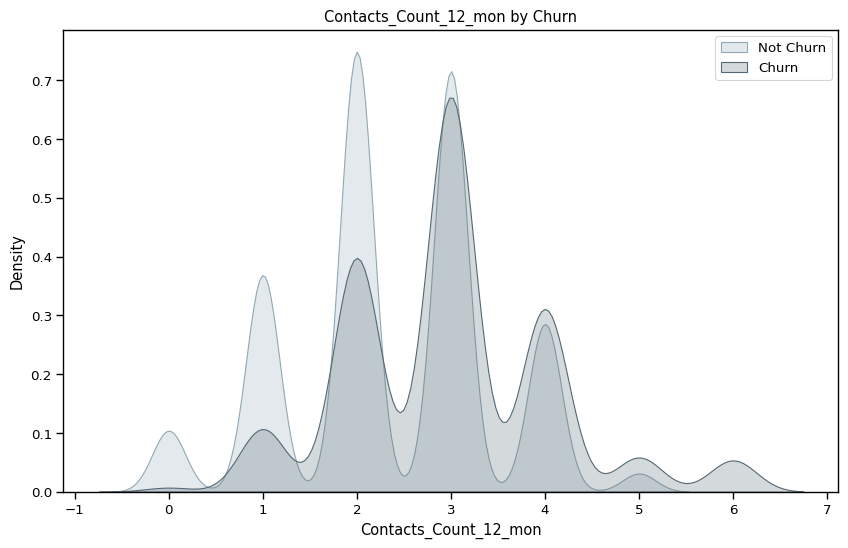

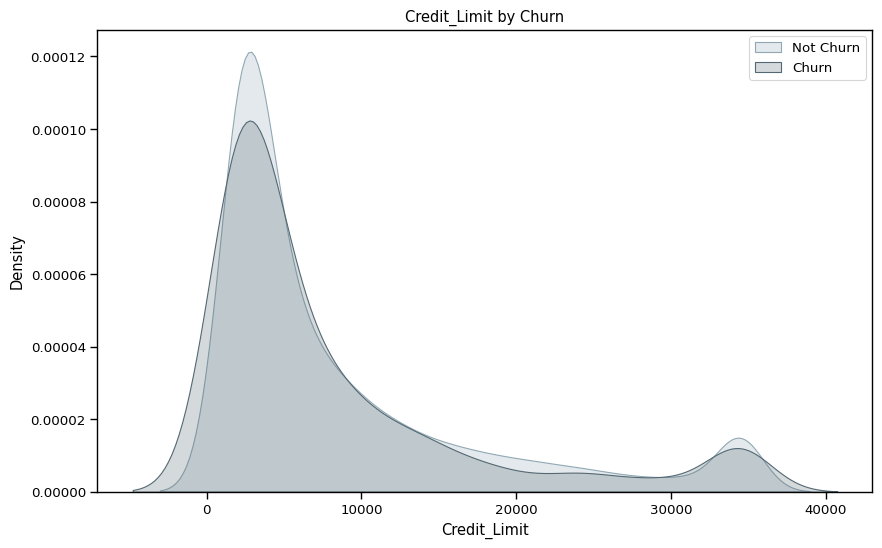

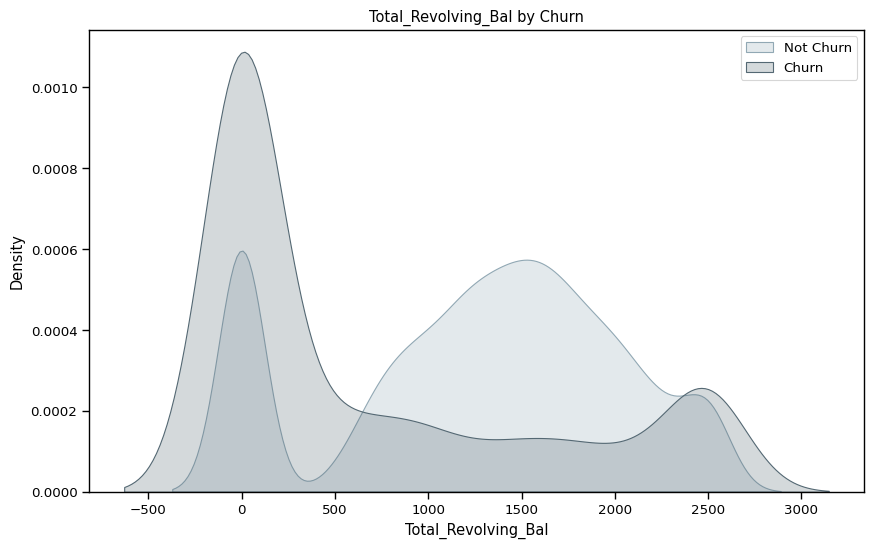

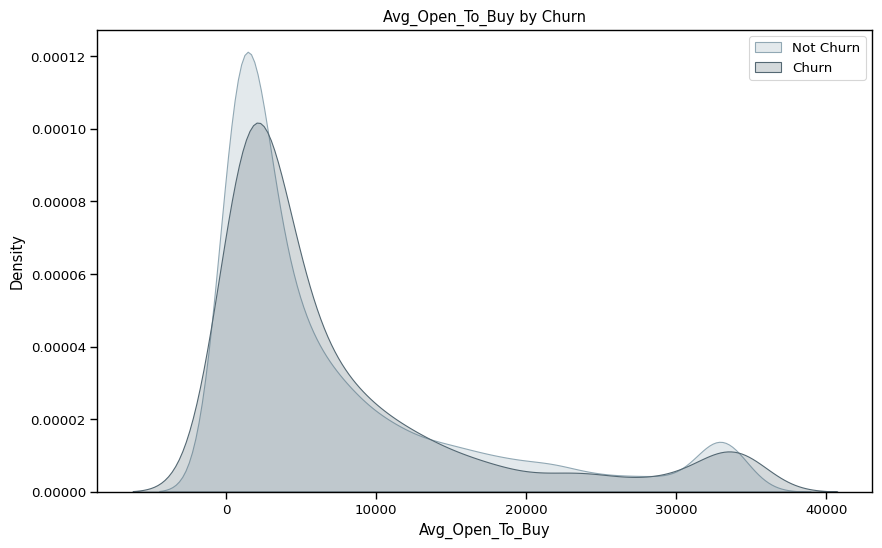

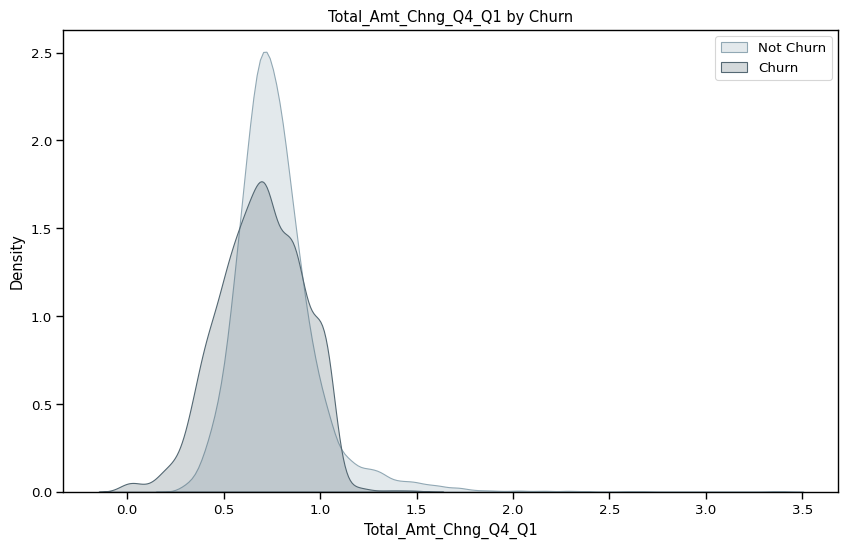

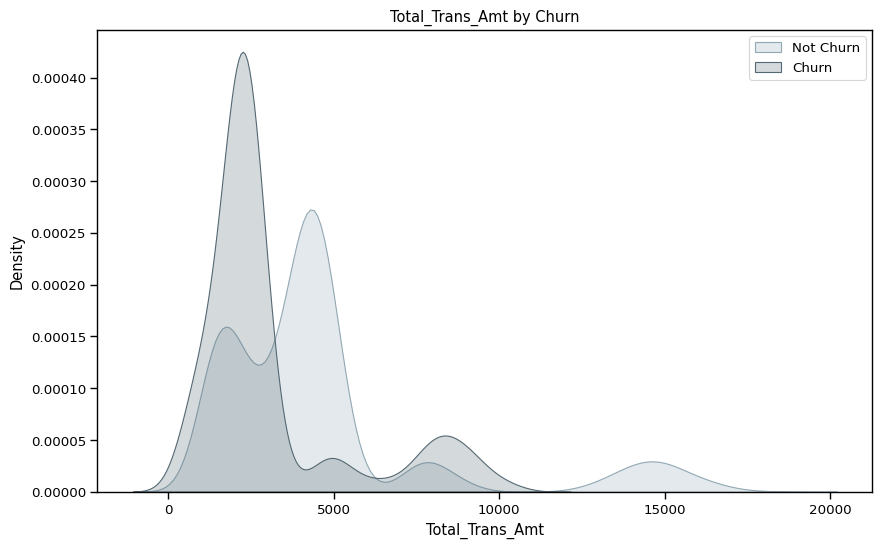

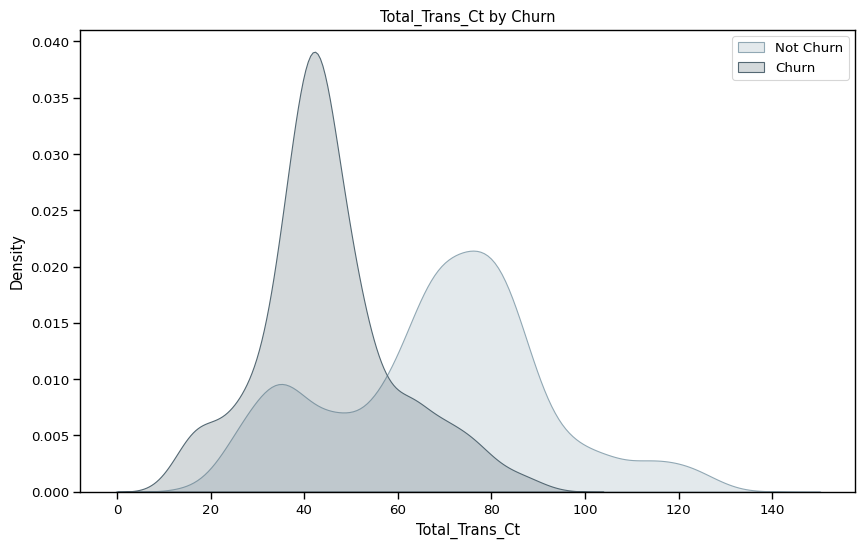

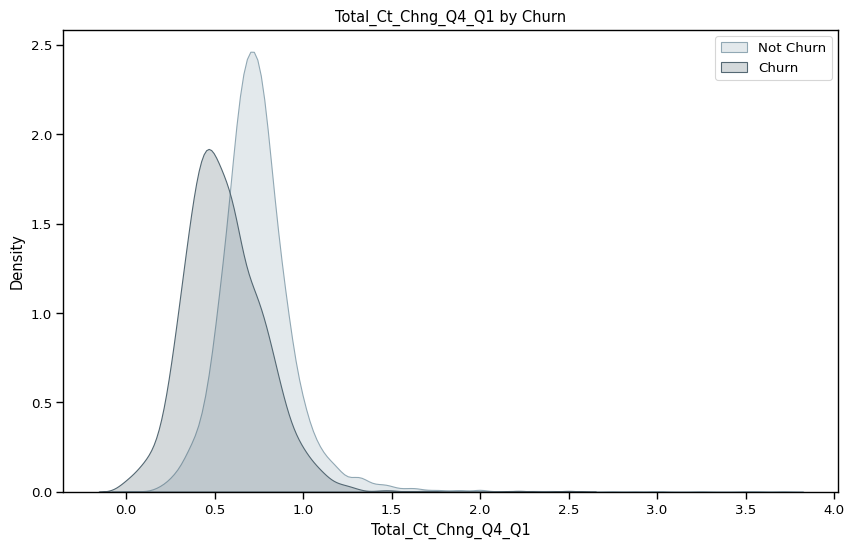

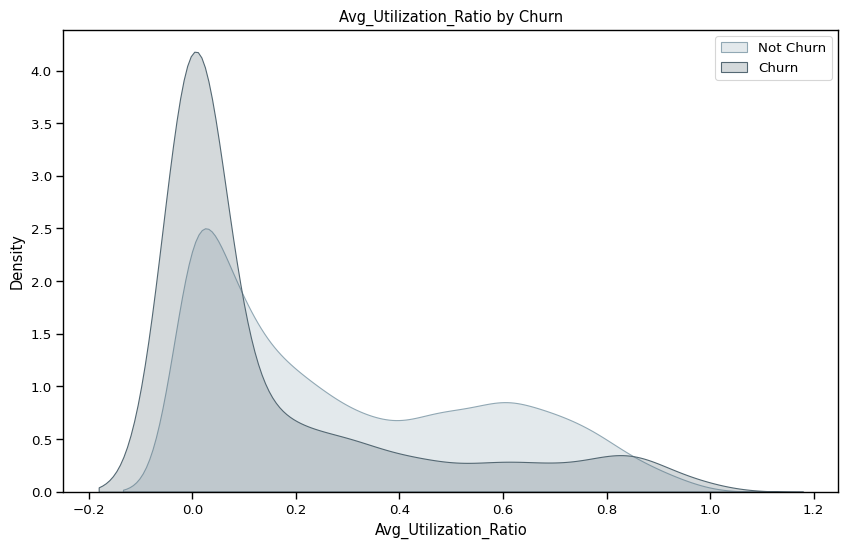

In [11]:

sns.set_context("paper", font_scale=1.1)
columns = [
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

for column in columns:
    plt.figure(figsize=(10, 6))
    ax = sns.kdeplot(df[column][(df["Attrition_Flag"] == 0)], color="#91a8b4", fill=True)
    ax = sns.kdeplot(df[column][(df["Attrition_Flag"] == 1)], color="#546873", fill=True)
    ax.legend(["Not Churn", "Churn"], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(column)
    ax.set_title(f'{column} by Churn')
    plt.show()

#2.3. KẾT LUẬN

- Khách hàng có thời gian inactive cao hầu như sẽ churn, đặc biệt nhóm KH active từ 3 tháng
bắt đầu từ tháng thứ 2 đã có khả năng churn
- Kh liên hệ càng nhiều càng dễ Churn (có thể lạc liên hệ để phàn nàn về chất lượng dịch vụ, nên care đối tượng này), cụ thể liên hệ 3 lần là khả năng sau sẽ churn
- Churn sẽ có credit limit thấp hơn, và nhóm có limit cao cũng sẽ dễ churn
- total revoling bal thấp (<700) hầu như sẽ churn (>2400) cũng sẽ churn. 700-2400 khả năng churn thấp
- Tỷ lệ sử dụng tín dụng và Tín dụng tuần hoàn cũng cho ta thấy những user Churn có xu hướng thấp hơn các user không Churn. user đã giảm dần tần xuất sử dụng thẻ tín dụng trước khi rời bỏ dịch vụ
- Khách hàng Churn có giao dịch ít hơn 4000 USD/năm và có ít hơn 60 giao dịch/ năm.

In [ ]:
filtered_df = churn_df[(churn_df['Months_Inactive_12_mon'] > 1) & (churn_df['Contacts_Count_12_mon'] > 2)]

In [ ]:
#số lượng KH Inactive từ 2 lần và có số lần liên hệ từ 3 lần trở lên
filtered_df.CLIENTNUM.count()

1028

In [ ]:
filtered_df.CLIENTNUM.count()/df.CLIENTNUM.count()

0.10151081267897699

Số lượng khách hàng inactive > 2 tháng và số lần liên hệ ngân hàng > 3 tháng chiếm 10.15% tổng số khách hàng rời bỏ >>> Số lượng có thể tập trung take care

#3. THỰC HIỆN MÔ HÌNH

#3.1. CODING

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Education_Level']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Income_Category']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Marital_Status']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Card_Category']).drop(columns=['Platinum'])],axis=1)
df.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,M,3,39,5,1,3,12691.0,777,...,False,True,False,False,False,True,False,True,False,False
1,0,49,F,5,44,6,1,2,8256.0,864,...,False,False,False,True,False,False,True,True,False,False
2,0,51,M,3,36,4,1,0,3418.0,0,...,False,False,True,False,False,True,False,True,False,False
3,0,40,F,4,34,3,4,1,3313.0,2517,...,False,False,False,True,False,False,False,True,False,False
4,0,40,M,3,21,5,1,0,4716.0,0,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,40,3,2,3,4003.0,1851,...,True,False,False,False,False,False,True,True,False,False
10123,1,41,M,2,25,4,2,3,4277.0,2186,...,True,False,False,False,True,False,False,True,False,False
10124,1,44,F,1,36,5,3,4,5409.0,0,...,False,False,False,True,False,True,False,True,False,False
10125,1,30,M,2,36,4,3,3,5281.0,0,...,True,False,False,False,False,False,False,True,False,False


In [ ]:

df.Gender = df.Gender.replace({"M": 0, "F": 1})
df.Gender

0        0
1        1
2        0
3        1
4        0
        ..
10122    0
10123    0
10124    1
10125    0
10126    1
Name: Gender, Length: 10127, dtype: int64

In [ ]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,False,True,False,False,False,True,False,True,False,False
1,0,49,1,5,44,6,1,2,8256.0,864,...,False,False,False,True,False,False,True,True,False,False
2,0,51,0,3,36,4,1,0,3418.0,0,...,False,False,True,False,False,True,False,True,False,False
3,0,40,1,4,34,3,4,1,3313.0,2517,...,False,False,False,True,False,False,False,True,False,False
4,0,40,0,3,21,5,1,0,4716.0,0,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,40,3,2,3,4003.0,1851,...,True,False,False,False,False,False,True,True,False,False
10123,1,41,0,2,25,4,2,3,4277.0,2186,...,True,False,False,False,True,False,False,True,False,False
10124,1,44,1,1,36,5,3,4,5409.0,0,...,False,False,False,True,False,True,False,True,False,False
10125,1,30,0,2,36,4,3,3,5281.0,0,...,True,False,False,False,False,False,False,True,False,False


#3.2. SCALE DỮ LIỆU VÀ THỰC HIỆN MODLEING

In [ ]:
from sklearn.preprocessing import MinMaxScaler



In [ ]:
min_max_scaler = MinMaxScaler()
std_values = min_max_scaler.fit_transform(df)
std_values

array([[0.        , 0.40425532, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.4893617 , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.53191489, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.38297872, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.08510638, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.36170213, 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
df_scale = pd.DataFrame(std_values, columns=df.columns)

In [ ]:
X = df_scale.drop(['Attrition_Flag'], axis=1)
y = df_scale['Attrition_Flag']


In [ ]:
X

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0.404255,0.0,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.489362,1.0,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.531915,0.0,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.297872,1.0,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.297872,0.0,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.510638,0.0,0.4,0.627907,0.4,0.333333,0.500000,0.077536,0.735399,0.062266,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10123,0.319149,0.0,0.4,0.279070,0.6,0.333333,0.500000,0.085819,0.868494,0.060499,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
10124,0.382979,1.0,0.2,0.534884,0.8,0.500000,0.666667,0.120042,0.000000,0.156637,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
10125,0.085106,0.0,0.4,0.534884,0.6,0.500000,0.500000,0.116172,0.000000,0.152928,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nochurn_X_train = X_train[y_train == 0]
nochurn_X_train

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
9066,0.595745,1.0,0.2,0.534884,0.0,0.500000,0.500000,0.069071,0.686532,0.057717,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
792,0.404255,1.0,0.8,0.534884,1.0,0.166667,0.500000,0.439834,0.654748,0.415380,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1791,0.170213,1.0,0.4,0.534884,0.6,0.500000,0.666667,0.066108,1.000000,0.032017,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
5011,0.489362,1.0,0.4,0.604651,0.8,0.500000,0.666667,0.038748,0.765197,0.022919,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2260,0.723404,1.0,0.0,0.744186,0.8,0.333333,0.666667,0.000000,0.257449,0.022812,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.297872,0.0,0.4,0.325581,0.8,0.500000,0.166667,0.326797,0.525626,0.316460,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
466,0.787234,0.0,0.4,0.837209,0.8,0.333333,0.500000,0.380822,0.818832,0.346855,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5390,0.340426,1.0,0.8,0.441860,0.4,0.166667,0.333333,0.026474,0.614621,0.022137,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
860,0.297872,0.0,0.6,0.348837,0.6,0.166667,0.166667,0.064234,0.678188,0.053690,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
churn_X_train = X_train[y_train == 1]
churn_X_train

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
5814,0.680851,1.0,0.8,0.813953,0.0,0.666667,0.500000,0.119649,0.716329,0.104019,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6025,0.148936,1.0,0.6,0.534884,0.8,0.333333,0.500000,0.000565,0.000000,0.042129,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
9334,0.063830,0.0,0.0,0.046512,0.2,0.166667,0.500000,0.199037,0.000000,0.232347,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6942,0.659574,0.0,0.4,0.534884,0.8,0.500000,0.500000,0.086998,0.000000,0.124967,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5614,0.425532,1.0,0.2,0.511628,0.8,0.500000,0.500000,0.022937,0.183155,0.050213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,0.617021,1.0,0.4,0.534884,1.0,0.333333,0.500000,0.089840,1.000000,0.054762,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6420,0.468085,1.0,0.8,0.534884,0.6,0.500000,0.500000,0.039353,0.963449,0.009040,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
6265,0.510638,1.0,0.6,0.534884,0.2,0.500000,0.500000,0.004042,0.000000,0.045461,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5734,0.382979,1.0,0.2,0.581395,0.4,0.333333,0.833333,0.081738,1.000000,0.046997,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
oversampling_churn_X_train = churn_X_train.sample(len(nochurn_X_train), replace=True)
oversampling_churn_X_train

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
5287,0.531915,1.0,0.2,0.744186,0.8,0.500000,0.166667,0.015530,0.560588,0.015588,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4073,0.234043,1.0,0.4,0.534884,0.2,0.500000,0.000000,0.005191,0.000000,0.046562,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
7550,0.531915,0.0,0.2,0.604651,0.6,0.500000,0.666667,0.696049,0.375844,0.681280,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8334,0.382979,1.0,0.4,0.511628,0.2,0.500000,0.666667,0.083370,0.222884,0.105236,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3227,0.489362,0.0,1.0,0.720930,0.2,0.500000,0.666667,0.074210,0.000000,0.112711,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,0.340426,0.0,0.0,0.534884,0.6,0.500000,1.000000,0.431127,0.000000,0.454785,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8880,0.255319,0.0,0.2,0.395349,0.8,0.500000,0.500000,0.285259,0.959476,0.245009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5541,0.404255,1.0,0.6,0.465116,0.8,0.500000,0.666667,0.087875,0.873262,0.062122,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5893,0.702128,1.0,0.2,0.534884,0.8,0.500000,0.500000,0.006854,0.000000,0.048156,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
oversampling_churn_y_train = y_train[oversampling_churn_X_train.index]
oversampling_churn_y_train

5287    1.0
4073    1.0
7550    1.0
8334    1.0
3227    1.0
       ... 
4966    1.0
8880    1.0
5541    1.0
5893    1.0
5312    1.0
Name: Attrition_Flag, Length: 6801, dtype: float64

In [ ]:
oversampling_X_train = pd.concat([nochurn_X_train.reset_index(), oversampling_churn_X_train.reset_index()], axis=0)
oversampling_X_train

,index,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,9066,0.595745,1.0,0.2,0.534884,0.0,0.500000,0.500000,0.069071,0.686532,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,792,0.404255,1.0,0.8,0.534884,1.0,0.166667,0.500000,0.439834,0.654748,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1791,0.170213,1.0,0.4,0.534884,0.6,0.500000,0.666667,0.066108,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,5011,0.489362,1.0,0.4,0.604651,0.8,0.500000,0.666667,0.038748,0.765197,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2260,0.723404,1.0,0.0,0.744186,0.8,0.333333,0.666667,0.000000,0.257449,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6796,4966,0.340426,0.0,0.0,0.534884,0.6,0.500000,1.000000,0.431127,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6797,8880,0.255319,0.0,0.2,0.395349,0.8,0.500000,0.500000,0.285259,0.959476,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6798,5541,0.404255,1.0,0.6,0.465116,0.8,0.500000,0.666667,0.087875,0.873262,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6799,5893,0.702128,1.0,0.2,0.534884,0.8,0.500000,0.500000,0.006854,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
oversampling_y_train = pd.concat([y_train[y_train == 0].reset_index(), oversampling_churn_y_train.reset_index()], axis=0)
oversampling_y_train

,index,Attrition_Flag
0,9066,0.0
1,792,0.0
2,1791,0.0
3,5011,0.0
4,2260,0.0
...,...,...
6796,4966,1.0
6797,8880,1.0
6798,5541,1.0
6799,5893,1.0


In [ ]:
oversampling_X_train.drop(columns=['index'], inplace=True)
oversampling_y_train.drop(columns=['index'], inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GridSearchCV(RandomForestClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),
    GridSearchCV(KNeighborsClassifier(), param_grid={
        'n_neighbors': [10, 50, 100, 200],
    }),
    GridSearchCV(SVC(), param_grid={
        'C': [1, 10],
        'kernel': ['linear', 'rbf'],
    }),
    GridSearchCV(AdaBoostClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),
    GridSearchCV(GradientBoostingClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),

]

#3.3. ĐÁNH GIÁ MÔ HÌNH KHI KHÔNG XỬ LÝ IMBALANCE

In [ ]:
for model in models:
    _model = model
    _model.fit(X_train, y_train)
    pred = _model.predict(X_test)
    print('-'*10)
    print(_model)
    try:
      print(f"BEST PARAM: {_model.best_params_}")
    except:
      pass
    print(classification_report(y_test, pred))
    print('-'*10)


----------
LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1699
         1.0       0.76      0.47      0.58       327

    accuracy                           0.89      2026
   macro avg       0.83      0.72      0.76      2026
weighted avg       0.88      0.89      0.88      2026

----------
----------
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1699
         1.0       0.79      0.76      0.78       327

    accuracy                           0.93      2026
   macro avg       0.87      0.86      0.87      2026
weighted avg       0.93      0.93      0.93      2026

----------
----------
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97  

#3.4. ĐÁNH GIÁ MÔ HÌNH KHI KHÔNG XỬ LÝ IMBALANCE

In [ ]:
for model in models:
    _model = model
    _model.fit(oversampling_X_train, oversampling_y_train)
    pred = _model.predict(X_test)
    print('-'*10)
    print(_model)
    try:
      print(f"BEST PARAM: {_model.best_params_}")
    except:
      pass
    print(classification_report(y_test, pred))
    print('-'*10)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------
LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91      1699
         1.0       0.53      0.83      0.64       327

    accuracy                           0.85      2026
   macro avg       0.74      0.84      0.77      2026
weighted avg       0.89      0.85      0.86      2026

----------
----------
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1699
         1.0       0.77      0.74      0.76       327

    accuracy                           0.92      2026
   macro avg       0.86      0.85      0.86      2026
weighted avg       0.92      0.92      0.92      2026

----------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

----------
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1699
         1.0       0.92      0.81      0.86       327

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

----------


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

----------
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 50, 100, 200]})
BEST PARAM: {'n_neighbors': 10}
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82      1699
         1.0       0.32      0.61      0.42       327

    accuracy                           0.73      2026
   macro avg       0.62      0.68      0.62      2026
weighted avg       0.82      0.73      0.76      2026

----------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

----------
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})
BEST PARAM: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      1699
         1.0       0.64      0.76      0.69       327

    accuracy                           0.89      2026
   macro avg       0.79      0.84      0.81      2026
weighted avg       0.90      0.89      0.89      2026

----------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

----------
GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      1699
         1.0       0.79      0.91      0.85       327

    accuracy                           0.95      2026
   macro avg       0.89      0.93      0.91      2026
weighted avg       0.95      0.95      0.95      2026

----------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

----------
GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      1699
         1.0       0.84      0.96      0.89       327

    accuracy                           0.96      2026
   macro avg       0.91      0.96      0.94      2026
weighted avg       0.97      0.96      0.96      2026

----------


LỰA CHỌN MÔ HÌNH
- Khi không xử lí imbalance: GradientBoosting cho kết quả tốt nhất với Accuracy = 0.97, F1-Score = 0.9 và Recall = 0.88, Precision = 0.92
- Khi xử lí imbalance bằng kỹ thuật Oversampling thì mô hình GradientBoosting cũng cho kết quả tốt nhất với Accuracy = 0.96, F1-Score = 0.89 và Recall = 0.96, Precision = 0.84
>> bài toán churn thường liên quan đến việc phát hiện những khách hàng có khả năng rời đi, Recall là một thước đo rất quan trọng. Trong trường hợp này, mô hình Gradient Boosting với xử lý imbalance bằng kỹ thuật Oversampling cho kết quả Recall cao hơn (0.96 so với 0.88). Mặc dù Precision giảm, việc tăng Recall không bỏ lỡ quá nhiều khách hàng có khả năng churn.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Tạo mô hình Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(oversampling_X_train, oversampling_y_train)

# Tính toán tầm quan trọng của các đặc trưng
importances = gb_model.feature_importances_

# Hiển thị tầm quan trọng của các đặc trưng
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     Feature  Importance
12            Total_Trans_Ct    0.500636
11           Total_Trans_Amt    0.192637
8        Total_Revolving_Bal    0.120699
13       Total_Ct_Chng_Q4_Q1    0.066557
4   Total_Relationship_Count    0.044525
10      Total_Amt_Chng_Q4_Q1    0.027584
5     Months_Inactive_12_mon    0.017429
0               Customer_Age    0.009403
6      Contacts_Count_12_mon    0.008848
3             Months_on_book    0.003663
9            Avg_Open_To_Buy    0.002346
1                     Gender    0.002346
7               Credit_Limit    0.001242
27                   Married    0.001051
14     Avg_Utilization_Ratio    0.000846
28                    Single    0.000093
22               $40K - $60K    0.000090
17                  Graduate    0.000004
24              $80K - $120K    0.000000
30                      Gold    0.000000
29                      Blue    0.000000
26                  Divorced    0.000000
25            Less than $40K    0.000000
16              

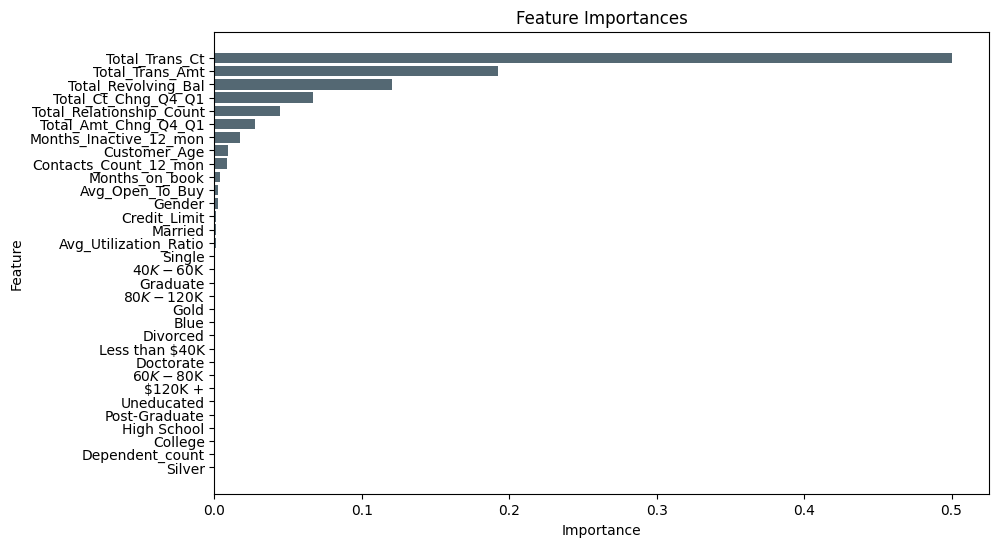

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='#546873')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

#4. THỬ MÔ HÌNH KHI XỬ LÍ OUTLIER


In [ ]:
df1 = pd.read_csv('https://drive.google.com/u/0/uc?id=1N0av5RojSGObNsv9C4O5NUPYGnCW8ULQ&export=download'+ link_data.split('/')[-2])
df1 = df1[df1.columns[:-2]]
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df1.Attrition_Flag = df1.Attrition_Flag.replace({"Existing Customer": 0, "Attrited Customer": 1})
df1.Attrition_Flag

10      0
14      0
29      0
34      0
35      0
       ..
8613    1
9135    1
9172    1
9194    1
9212    1
Name: Attrition_Flag, Length: 2133, dtype: int64

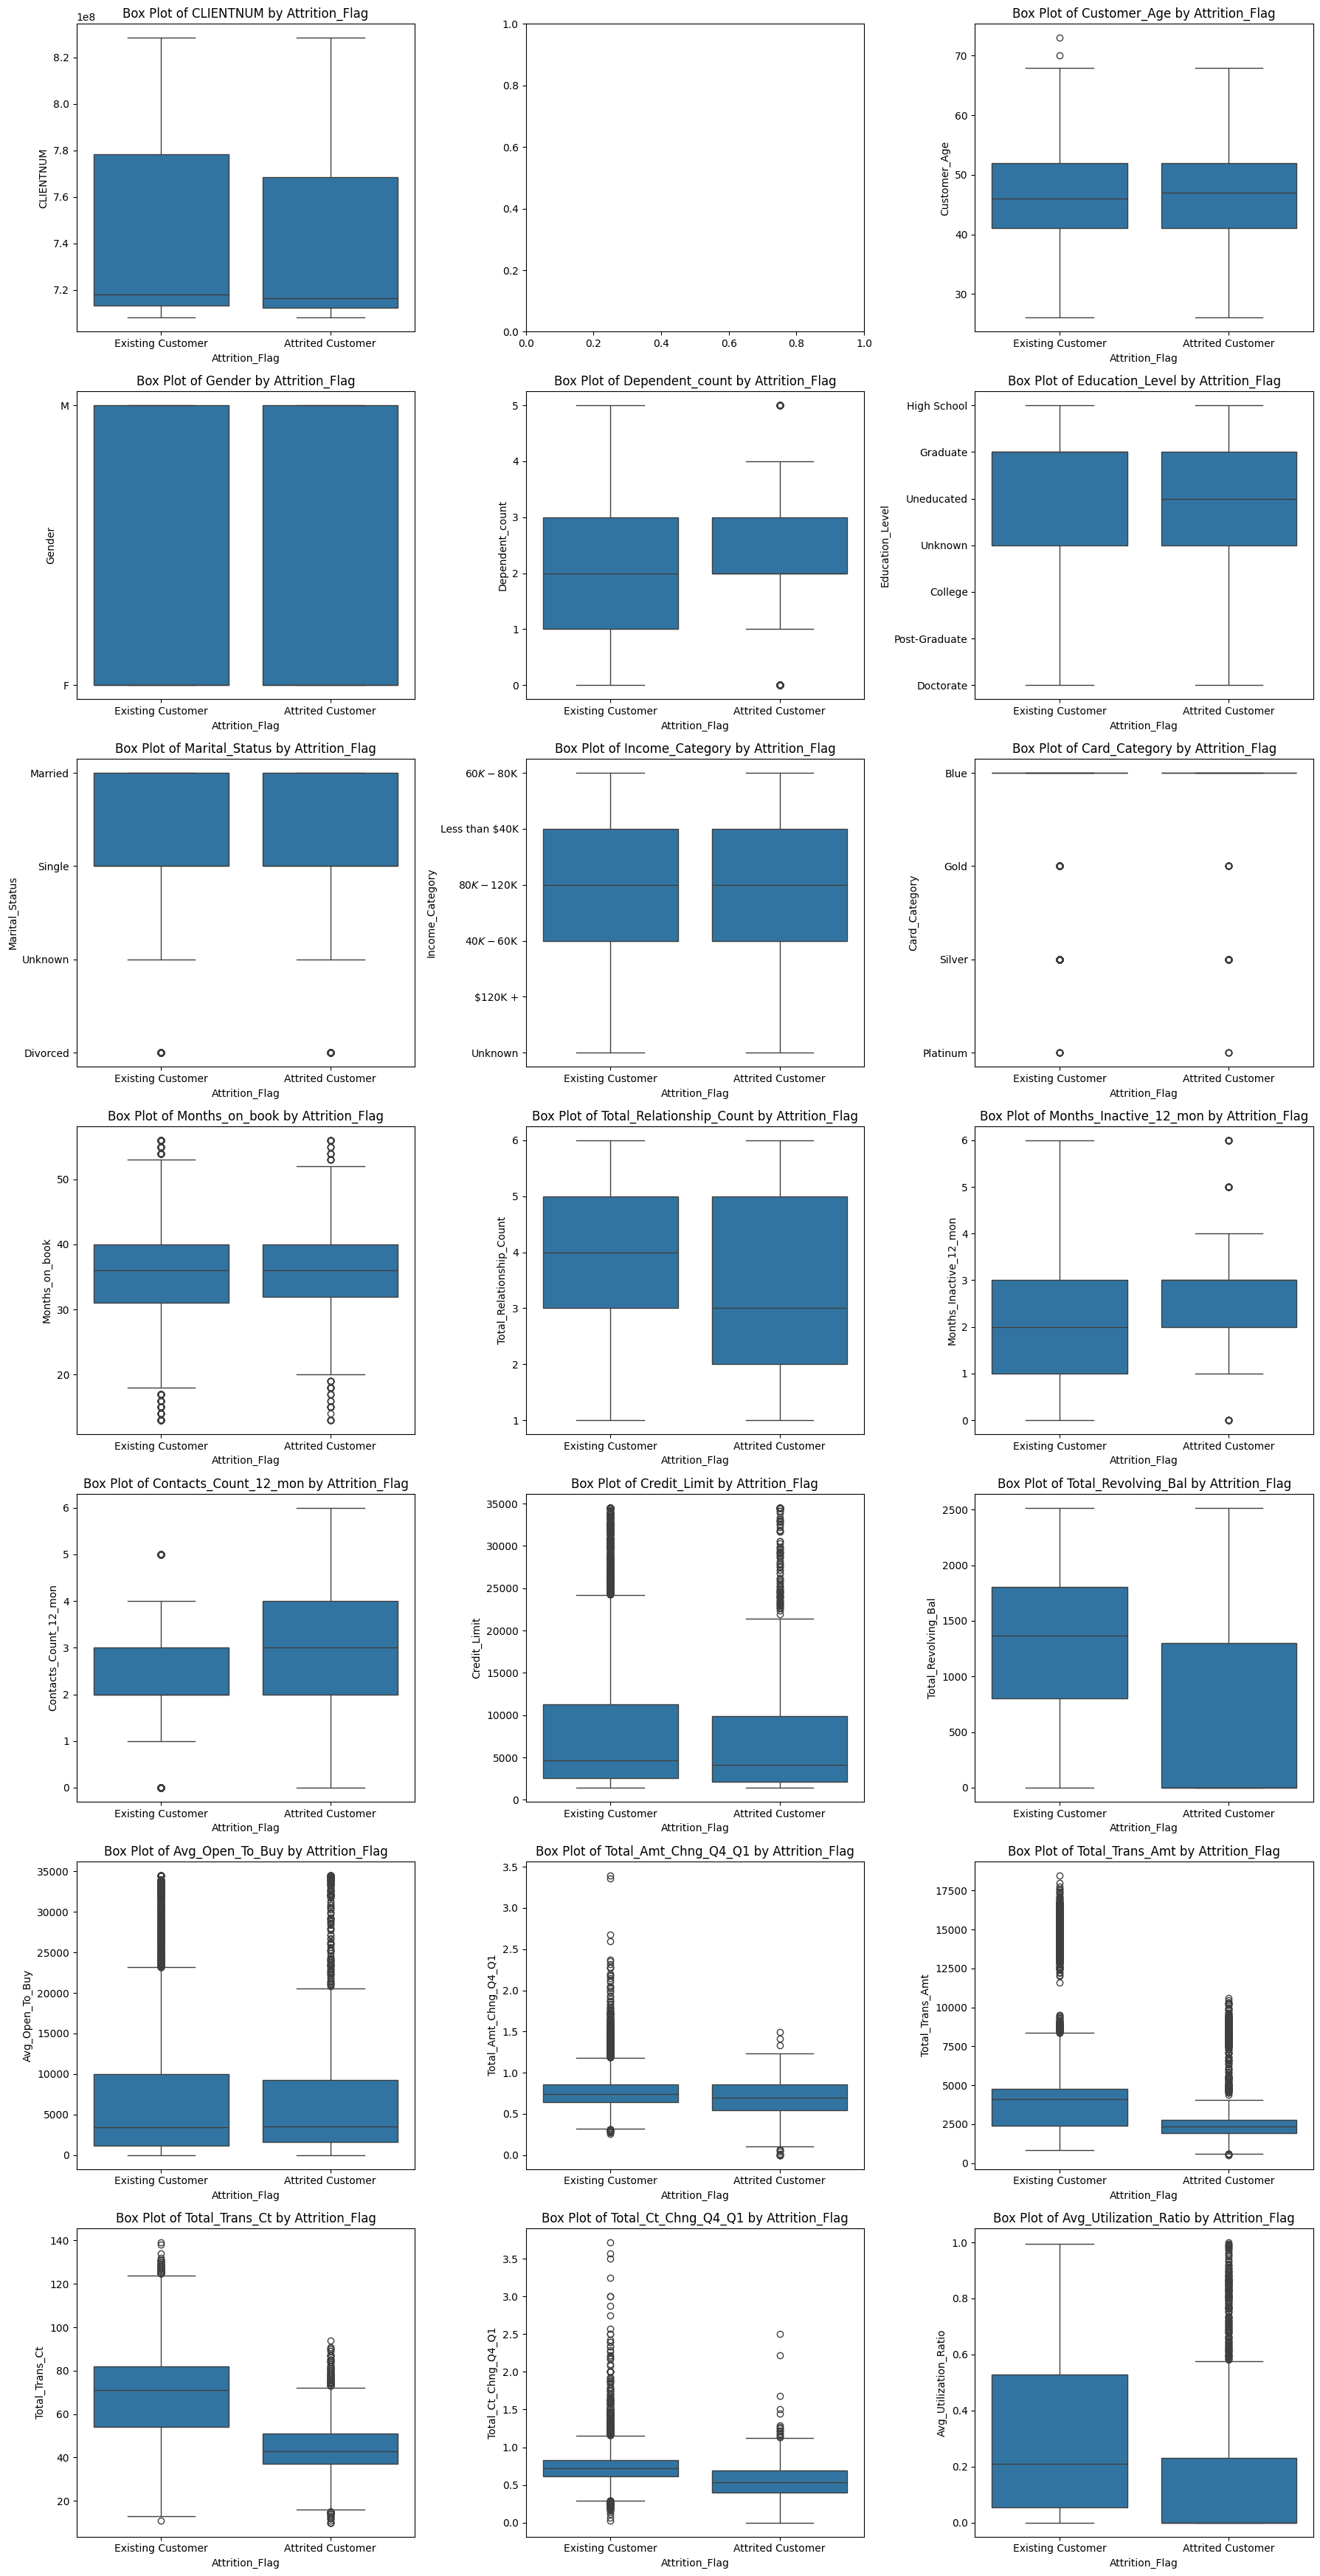

In [ ]:
num_columns = len(df1.columns)
rows = (num_columns // 3) + (num_columns % 3 > 0)

fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if col != 'Attrition_Flag':
        sns.boxplot(x='Attrition_Flag', y=col, data=df1, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col} by Attrition_Flag')

for ax in axes[num_columns:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

<ipython-input-62-48f502373eb8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Months_on_book,ax=ax1, fit=norm, color='#FB8861')
<ipython-input-62-48f502373eb8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Credit_Limit,ax=ax2, fit=norm, color='#56F9BB')
<ipython-input-62-48f502373eb8>:15:

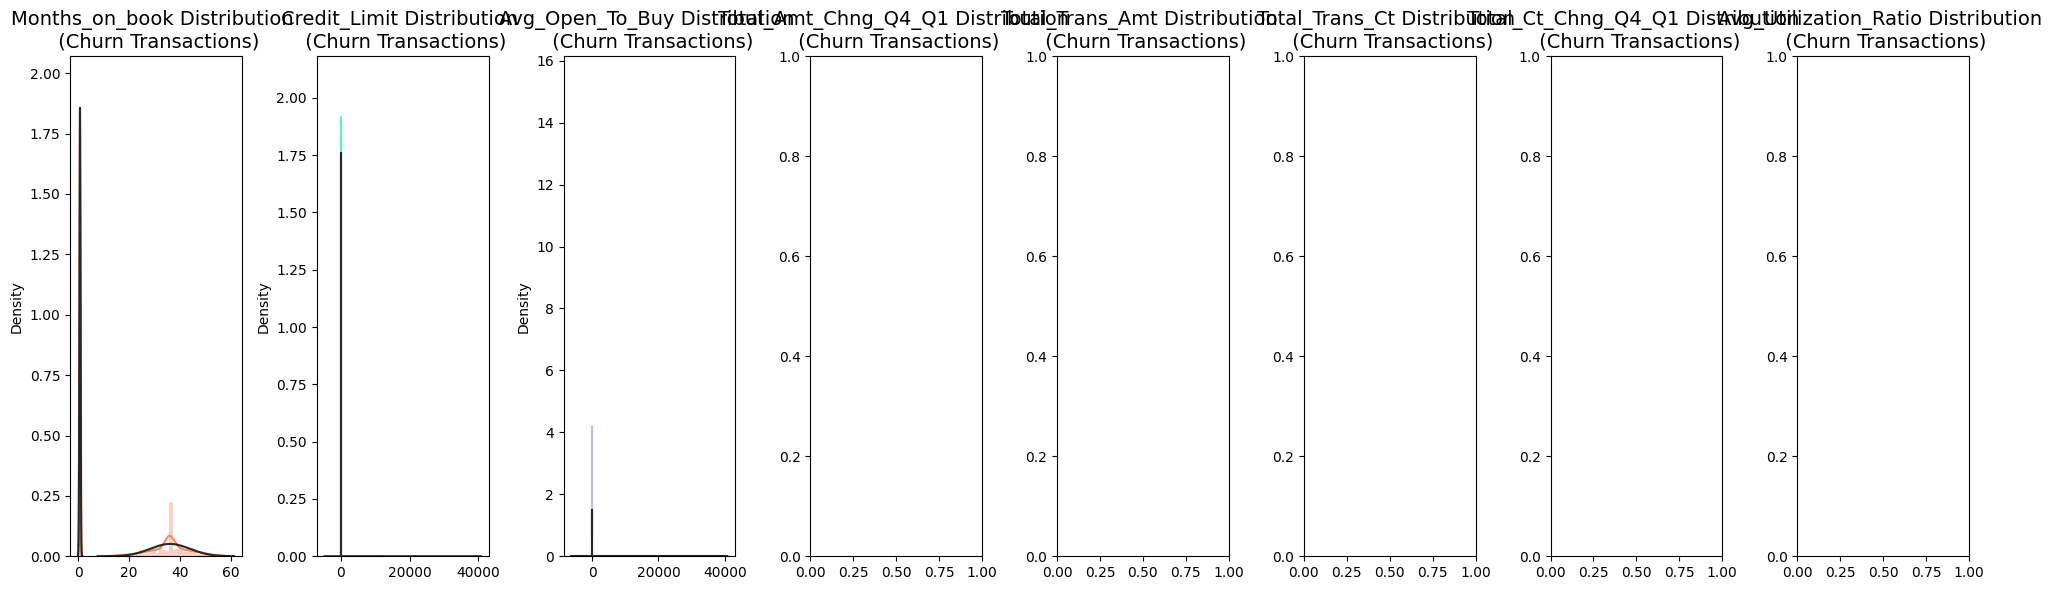

In [ ]:
from scipy.stats import norm

f, (ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1,8, figsize=(20, 6))

Months_on_book = df1['Months_on_book'].loc[df1['Attrition_Flag'] == 1].values
sns.distplot(Months_on_book,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Months_on_book Distribution \n (Churn Transactions)', fontsize=14)

Credit_Limit = df1['Credit_Limit'].loc[df1['Attrition_Flag'] == 1].values
sns.distplot(Credit_Limit,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Credit_Limit Distribution \n (Churn Transactions)', fontsize=14)


Avg_Open_To_Buy = df1['Avg_Open_To_Buy'].loc[df1['Attrition_Flag'] == 1].values
sns.distplot(Avg_Open_To_Buy,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Avg_Open_To_Buy Distribution \n (Churn Transactions)', fontsize=14)


Total_Amt_Chng_Q4_Q1 = df1['Total_Amt_Chng_Q4_Q1'].loc[df1['Attrition_Flag'] == 1].values
sns.distplot(Total_Amt_Chng_Q4_Q1,ax=ax1, fit=norm, color='#FB8861')
ax4.set_title('Total_Amt_Chng_Q4_Q1 Distribution \n (Churn Transactions)', fontsize=14)

Total_Trans_Amt = df1['Total_Trans_Amt'].loc[df1['Attrition_Flag'] == 1].values
sns.distplot(Total_Trans_Amt,ax=ax2, fit=norm, color='#56F9BB')
ax5.set_title('Total_Trans_Amt Distribution \n (Churn Transactions)', fontsize=14)


Total_Trans_Ct = df1['Total_Trans_Ct'].loc[df1['Attrition_Flag'] == 1].values
sns.distplot(Total_Trans_Ct,ax=ax3, fit=norm, color='#C5B3F9')
ax6.set_title('Total_Trans_Ct Distribution \n (Churn Transactions)', fontsize=14)

Total_Ct_Chng_Q4_Q1 = df1['Total_Ct_Chng_Q4_Q1'].loc[df1['Attrition_Flag'] == 1].values
sns.distplot(Total_Ct_Chng_Q4_Q1,ax=ax2, fit=norm, color='#56F9BB')
ax7.set_title('Total_Ct_Chng_Q4_Q1 Distribution \n (Churn Transactions)', fontsize=14)


Avg_Utilization_Ratio = df1['Avg_Utilization_Ratio'].loc[df1['Attrition_Flag'] == 1].values
sns.distplot(Avg_Utilization_Ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax8.set_title('Avg_Utilization_Ratio Distribution \n (Churn Transactions)', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
 # -----> Months_on_book Removing Outliers (Highest Negative Correlated with Labels)
Months_on_book = df1['Months_on_book'].loc[df1['Attrition_Flag'] == 1].values
q25, q75 = np.percentile(Months_on_book, 25), np.percentile(Months_on_book, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
Months_on_book_iqr = q75 - q25
print('iqr: {}'.format(Months_on_book_iqr))

Months_on_book_cut_off = Months_on_book_iqr * 1.5
Months_on_book_lower, Months_on_book_upper = q25 - Months_on_book_cut_off, q75 + Months_on_book_cut_off
print('Cut Off: {}'.format(Months_on_book_cut_off))
print('Months_on_book Lower: {}'.format(Months_on_book_lower))
print('Months_on_book Upper: {}'.format(Months_on_book_upper))

outliers = [x for x in Months_on_book if x < Months_on_book_lower or x > Months_on_book_upper]
print('Feature Months_on_book Outliers for Churn Cases: {}'.format(len(outliers)))
print('Months_on_book outliers:{}'.format(outliers))

df1= df1.drop(df1[(df1['Months_on_book'] > Months_on_book_upper) | (df1['Months_on_book'] < Months_on_book_lower)].index)
print('----' * 44)

# -----> Credit_Limit removing outliers from fraud transactions
Credit_Limit = df1['Credit_Limit'].loc[df1['Attrition_Flag'] == 1].values
q25, q75 = np.percentile(Credit_Limit, 25), np.percentile(Credit_Limit, 75)
Credit_Limit_iqr = q75 - q25

Credit_Limit_cut_off = Credit_Limit_iqr * 1.5
Credit_Limit_lower, Credit_Limit_upper = q25 - Credit_Limit_cut_off, q75 + Credit_Limit_cut_off
print('Credit_Limit Lower: {}'.format(Credit_Limit_lower))
print('Credit_Limit Upper: {}'.format(Credit_Limit_upper))
outliers = [x for x in Credit_Limit if x < Credit_Limit_lower or x > Credit_Limit_upper]
print('Credit_Limit outliers: {}'.format(outliers))
print('Feature Credit_Limit Outliers for churn Cases: {}'.format(len(outliers)))
df1 = df1.drop(df1[(df1['Credit_Limit'] > Credit_Limit_upper) | (df1['Credit_Limit'] < Credit_Limit_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df1)))
print('----' * 44)


# Removing outliers Avg_Open_To_Buy Feature
Avg_Open_To_Buy = df1['Avg_Open_To_Buy'].loc[df1['Attrition_Flag'] == 1].values
q25, q75 = np.percentile(Avg_Open_To_Buy, 25), np.percentile(Avg_Open_To_Buy, 75)
Avg_Open_To_Buy_iqr = q75 - q25

Avg_Open_To_Buy_cut_off = Avg_Open_To_Buy_iqr * 1.5
Avg_Open_To_Buy_lower, Avg_Open_To_Buy_upper = q25 - Avg_Open_To_Buy_cut_off, q75 + Avg_Open_To_Buy_cut_off
print('Avg_Open_To_Buy Lower: {}'.format(Avg_Open_To_Buy_lower))
print('Avg_Open_To_Buy Upper: {}'.format(Avg_Open_To_Buy_upper))
outliers = [x for x in Avg_Open_To_Buy if x < Avg_Open_To_Buy_lower or x > Avg_Open_To_Buy_upper]
print('Avg_Open_To_Buy outliers: {}'.format(outliers))
print('Feature Avg_Open_To_Buy Outliers for churn Cases: {}'.format(len(outliers)))
df1 = df1.drop(df1[(df1['Avg_Open_To_Buy'] > Avg_Open_To_Buy_upper) | (df1['Avg_Open_To_Buy'] < Avg_Open_To_Buy_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df1)))

# Removing outliers Total_Amt_Chng_Q4_Q1 Feature
Total_Amt_Chng_Q4_Q1 = df1['Total_Amt_Chng_Q4_Q1'].loc[df1['Attrition_Flag'] == 1].values
q25, q75 = np.percentile(Total_Amt_Chng_Q4_Q1, 25), np.percentile(Total_Amt_Chng_Q4_Q1, 75)
Total_Amt_Chng_Q4_Q1_iqr = q75 - q25

Total_Amt_Chng_Q4_Q1_cut_off = Total_Amt_Chng_Q4_Q1_iqr * 1.5
Total_Amt_Chng_Q4_Q1_lower, Total_Amt_Chng_Q4_Q1_upper = q25 - Total_Amt_Chng_Q4_Q1_cut_off, q75 + Total_Amt_Chng_Q4_Q1_cut_off
print('Total_Amt_Chng_Q4_Q1 Lower: {}'.format(Total_Amt_Chng_Q4_Q1_lower))
print('Total_Amt_Chng_Q4_Q1 Upper: {}'.format(Total_Amt_Chng_Q4_Q1_upper))
outliers = [x for x in Total_Amt_Chng_Q4_Q1 if x < Total_Amt_Chng_Q4_Q1_lower or x > Total_Amt_Chng_Q4_Q1_upper]
print('Total_Amt_Chng_Q4_Q1 outliers: {}'.format(outliers))
print('Feature Total_Amt_Chng_Q4_Q1 Outliers for Churn Cases: {}'.format(len(outliers)))
df1 = df1.drop(df1[(df1['Total_Amt_Chng_Q4_Q1'] > Total_Amt_Chng_Q4_Q1_upper) | (df1['Total_Amt_Chng_Q4_Q1'] < Total_Amt_Chng_Q4_Q1_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df1)))

# Removing outliers Total_Trans_Amt Feature
Total_Trans_Amt = df1['Total_Trans_Amt'].loc[df1['Attrition_Flag'] == 1].values
q25, q75 = np.percentile(Total_Trans_Amt, 25), np.percentile(Total_Trans_Amt, 75)
Total_Trans_Amt_iqr = q75 - q25

Total_Trans_Amt_cut_off = Total_Trans_Amt_iqr * 1.5
Total_Trans_Amt_lower, Total_Trans_Amt_upper = q25 - Total_Trans_Amt_cut_off, q75 + Total_Trans_Amt_cut_off
print('Total_Trans_Amt Lower: {}'.format(Total_Trans_Amt_lower))
print('Total_Trans_Amt Upper: {}'.format(Total_Trans_Amt_upper))
outliers = [x for x in Total_Trans_Amt if x < Total_Trans_Amt_lower or x > Total_Trans_Amt_upper]
print('Total_Trans_Amt outliers: {}'.format(outliers))
print('Feature Total_Trans_Amt Outliers for churn Cases: {}'.format(len(outliers)))
df1 = df1.drop(df1[(df1['Total_Trans_Amt'] > Total_Trans_Amt_upper) | (df1['Total_Trans_Amt'] < Total_Trans_Amt_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df1)))

# Removing outliers Total_Trans_Ct Feature
Total_Trans_Ct = df1['Total_Trans_Ct'].loc[df1['Attrition_Flag'] == 1].values
q25, q75 = np.percentile(Total_Trans_Ct, 25), np.percentile(Total_Trans_Ct, 75)
Total_Trans_Ct_iqr = q75 - q25

Total_Trans_Ct_cut_off = Total_Trans_Ct_iqr * 1.5
Total_Trans_Ct_lower, Total_Trans_Ct_upper = q25 - Total_Trans_Ct_cut_off, q75 + Total_Trans_Ct_cut_off
print('Total_Trans_Ct Lower: {}'.format(Total_Trans_Ct_lower))
print('Total_Trans_Ct Upper: {}'.format(Total_Trans_Ct_upper))
outliers = [x for x in Total_Trans_Ct if x < Total_Trans_Ct_lower or x > Total_Trans_Ct_upper]
print('Total_Trans_Ct outliers: {}'.format(outliers))
print('Feature Total_Trans_Ct Outliers for Churn Cases: {}'.format(len(outliers)))
df1 = df1.drop(df1[(df1['Total_Trans_Ct'] > Total_Trans_Ct_upper) | (df1['Total_Trans_Ct'] < Total_Trans_Ct_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df1)))

# Removing outliers Total_Ct_Chng_Q4_Q1 Feature
Total_Ct_Chng_Q4_Q1 = df1['Total_Ct_Chng_Q4_Q1'].loc[df1['Attrition_Flag'] == 1].values
q25, q75 = np.percentile(Total_Ct_Chng_Q4_Q1, 25), np.percentile(Total_Ct_Chng_Q4_Q1, 75)
Total_Ct_Chng_Q4_Q1_iqr = q75 - q25

Total_Ct_Chng_Q4_Q1_cut_off = Total_Ct_Chng_Q4_Q1_iqr * 1.5
Total_Ct_Chng_Q4_Q1_lower, Total_Ct_Chng_Q4_Q1_upper = q25 - Total_Ct_Chng_Q4_Q1_cut_off, q75 + Total_Ct_Chng_Q4_Q1_cut_off
print('Total_Ct_Chng_Q4_Q1 Lower: {}'.format(Total_Ct_Chng_Q4_Q1_lower))
print('Total_Ct_Chng_Q4_Q1 Upper: {}'.format(Total_Ct_Chng_Q4_Q1_upper))
outliers = [x for x in Total_Ct_Chng_Q4_Q1 if x < Total_Ct_Chng_Q4_Q1_lower or x > Total_Ct_Chng_Q4_Q1_upper]
print('Total_Ct_Chng_Q4_Q1 outliers: {}'.format(outliers))
print('Feature Total_Ct_Chng_Q4_Q1 Outliers for Churn Cases: {}'.format(len(outliers)))
df1 = df1.drop(df1[(df1['Total_Ct_Chng_Q4_Q1'] > Total_Ct_Chng_Q4_Q1_upper) | (df1['Total_Ct_Chng_Q4_Q1'] < Total_Ct_Chng_Q4_Q1_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df1)))

# Removing outliers Avg_Utilization_Ratio Feature
Avg_Utilization_Ratio = df1['Avg_Utilization_Ratio'].loc[df1['Attrition_Flag'] == 1].values
q25, q75 = np.percentile(Avg_Utilization_Ratio, 25), np.percentile(Avg_Utilization_Ratio, 75)
Avg_Utilization_Ratio_iqr = q75 - q25

Avg_Utilization_Ratio_cut_off = Avg_Utilization_Ratio_iqr * 1.5
Avg_Utilization_Ratio_lower, Avg_Utilization_Ratio_upper = q25 - Avg_Utilization_Ratio_cut_off, q75 + Avg_Utilization_Ratio_cut_off
print('Avg_Utilization_Ratio Lower: {}'.format(Avg_Utilization_Ratio_lower))
print('Avg_Utilization_Ratio Upper: {}'.format(Avg_Utilization_Ratio_upper))
outliers = [x for x in Avg_Utilization_Ratio if x < Avg_Utilization_Ratio_lower or x > Avg_Utilization_Ratio_upper]
print('Avg_Utilization_Ratio outliers: {}'.format(outliers))
print('Feature Avg_Utilization_Ratio Outliers for Churn Cases: {}'.format(len(outliers)))
df1 = df1.drop(df1[(df1['Avg_Utilization_Ratio'] > Avg_Utilization_Ratio_upper) | (df1['Avg_Utilization_Ratio'] < Avg_Utilization_Ratio_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df1)))



Quartile 25: 32.0 | Quartile 75: 40.0
iqr: 8.0
Cut Off: 12.0
Months_on_book Lower: 20.0
Months_on_book Upper: 52.0
Feature Months_on_book Outliers for Churn Cases: 77
Months_on_book outliers:[56, 53, 53, 56, 56, 56, 18, 53, 13, 15, 56, 15, 19, 13, 19, 13, 13, 56, 16, 18, 56, 56, 55, 56, 55, 56, 56, 56, 54, 56, 19, 18, 55, 17, 54, 15, 18, 19, 53, 18, 56, 15, 16, 18, 15, 15, 53, 54, 53, 56, 56, 18, 55, 16, 19, 54, 56, 53, 15, 15, 18, 14, 18, 18, 18, 13, 19, 18, 17, 13, 17, 13, 54, 17, 18, 15, 54]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Credit_Limit Lower: -9717.875
Credit_Limit Upper: 21765.125
Credit_Limit outliers: [34516.0, 32975.0, 27126.0, 27512.0, 30271.0, 27560.0, 34516.0, 34516.0, 29543.0, 34516.0, 33180.0, 27992.0, 34516.0, 32938.0, 22382.0, 34516.0, 34516.0, 34516.0, 34516.0, 25517.0, 23870.0, 34516.0, 34516.0, 29893.0, 34516.0, 34516.0, 34516

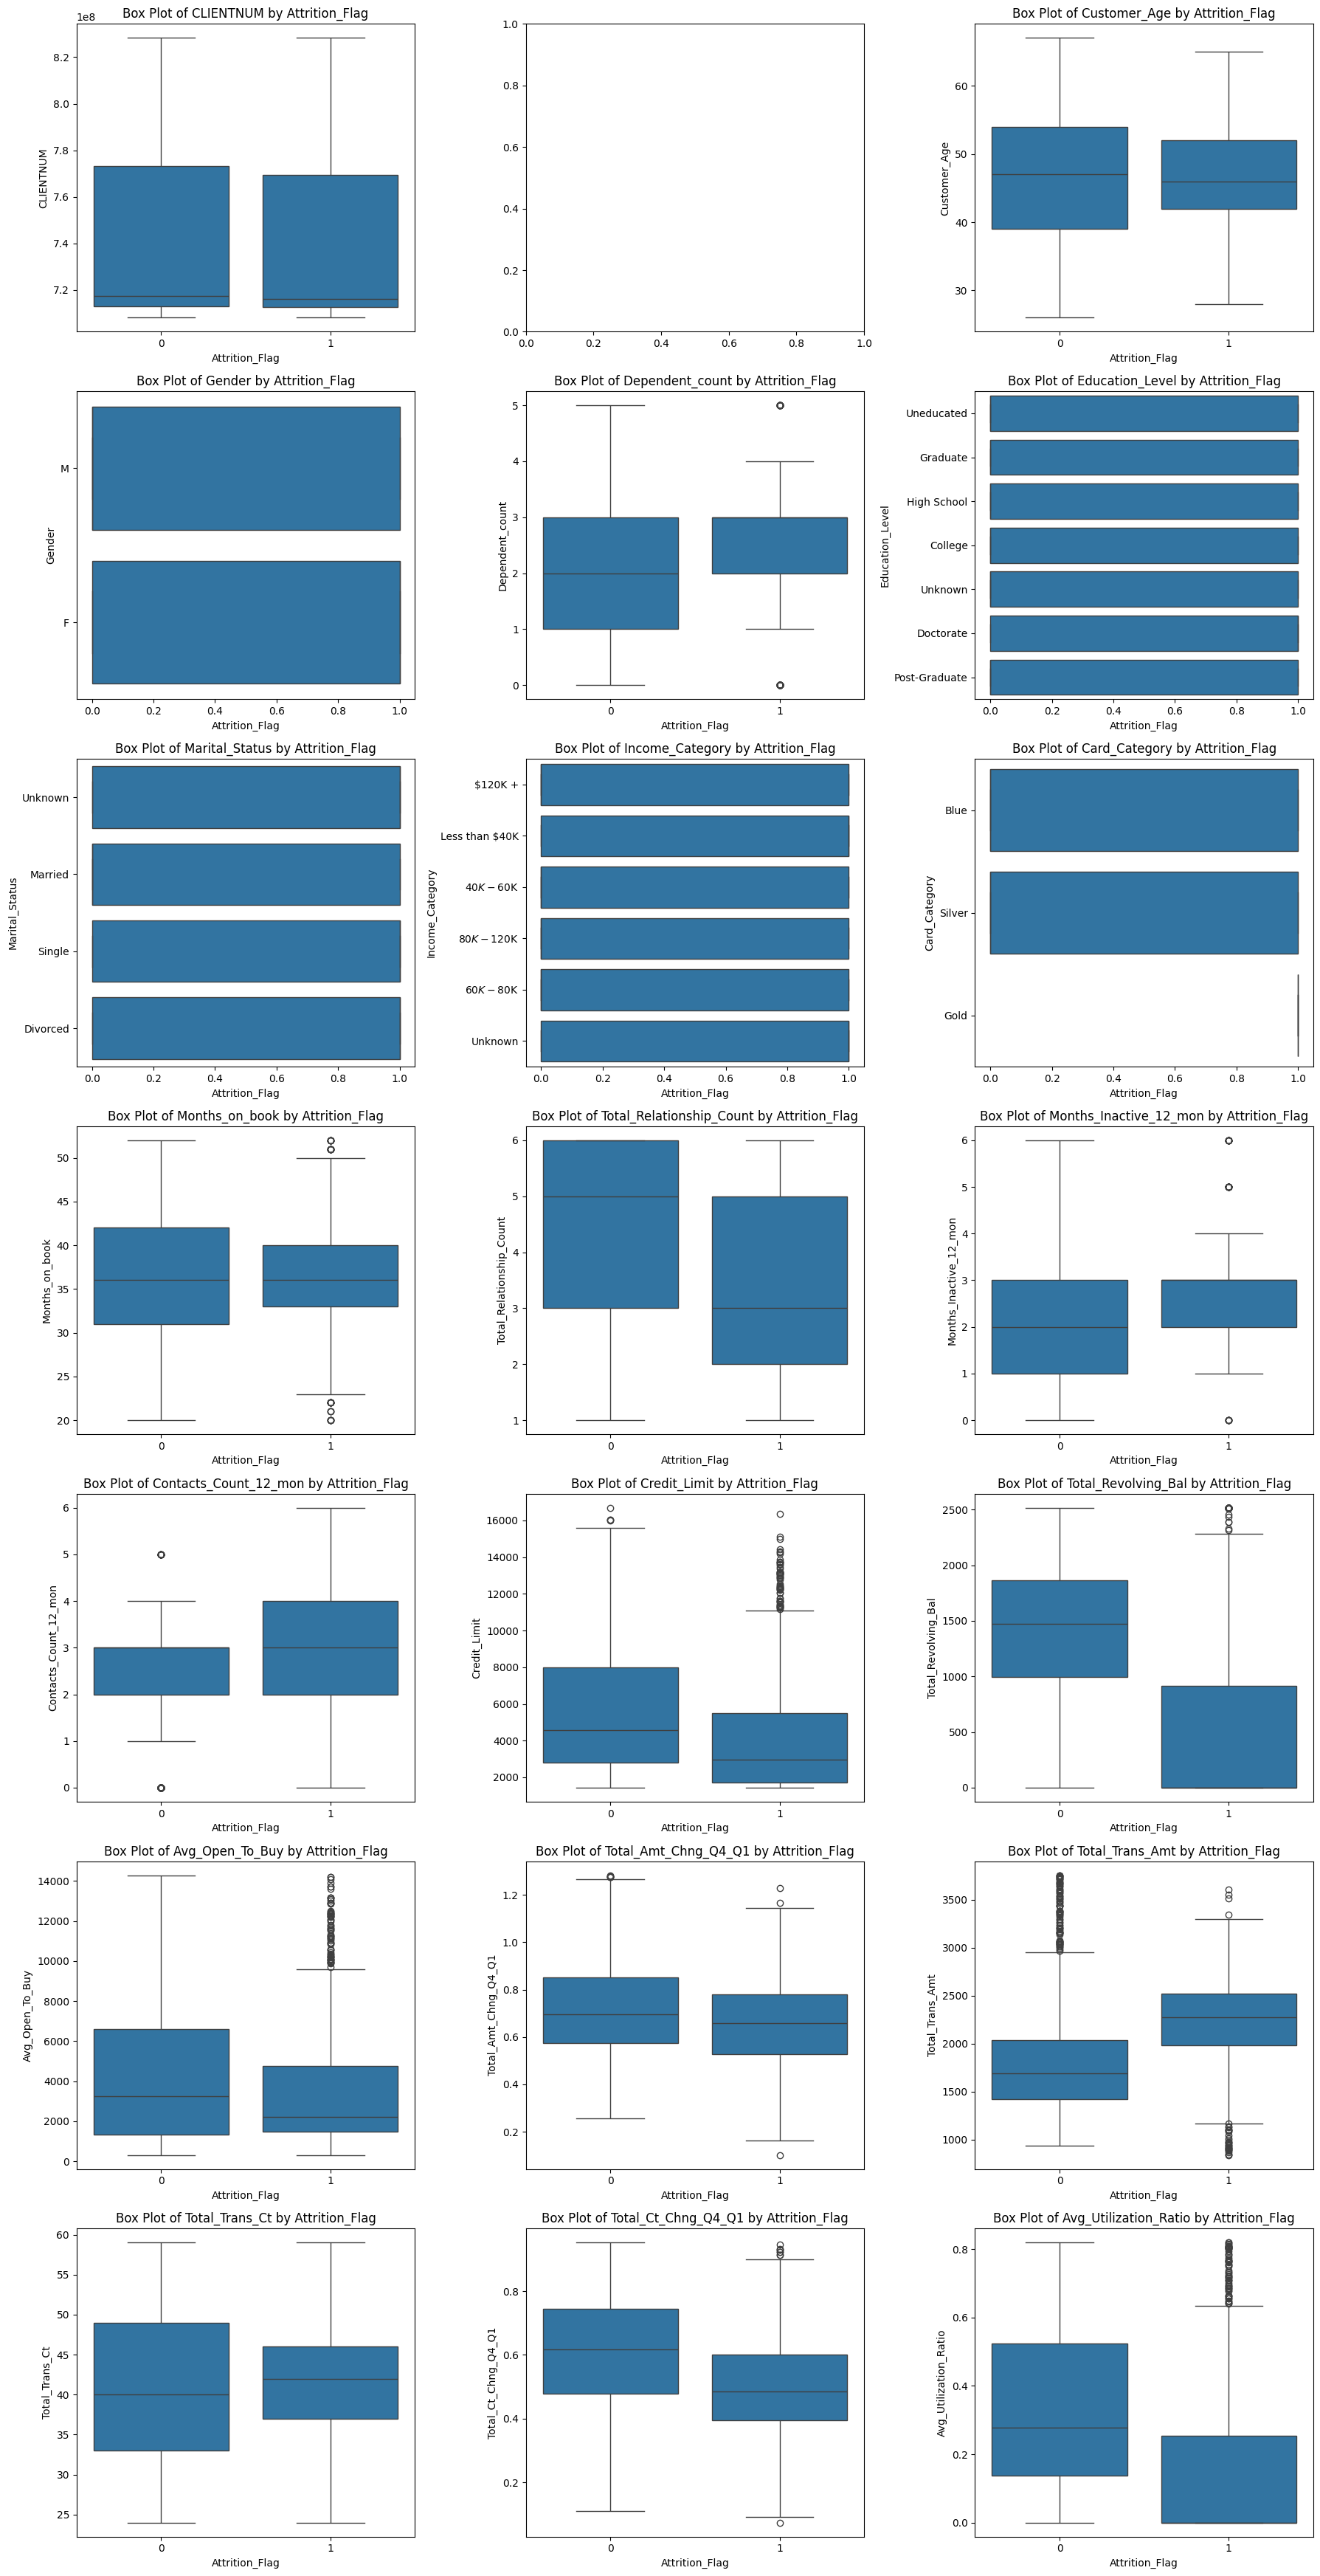

In [ ]:
num_columns = len(df1.columns)
rows = (num_columns // 3) + (num_columns % 3 > 0)

fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))
axes = axes.flatten()

for i, col in enumerate(df1.columns):
    if col != 'Attrition_Flag':
        sns.boxplot(x='Attrition_Flag', y=col, data=df1, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col} by Attrition_Flag')

for ax in axes[num_columns:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Số lượng Outlier đã giảm đáng kể sau khi xử lí Outlier

In [ ]:

df1.Gender = df.Gender.replace({"M": 0, "F": 1})
df1.Gender

10      0
14      1
29      0
34      0
35      1
       ..
8613    0
9135    0
9172    0
9194    1
9212    1
Name: Gender, Length: 2133, dtype: int64

In [ ]:
df1 = pd.concat([df1,pd.get_dummies(df1['Education_Level']).drop(columns=['Unknown'])],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df1['Income_Category']).drop(columns=['Unknown'])],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df1['Marital_Status']).drop(columns=['Unknown'])],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df1['Card_Category'])],axis=1)
df1.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)
df1

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
10,0,42,0,5,31,5,3,2,6748.0,1467,...,False,False,False,False,False,False,False,True,False,False
14,0,57,1,2,48,5,2,2,2436.0,680,...,False,False,False,True,False,True,False,True,False,False
29,0,47,0,4,42,6,0,0,4785.0,1362,...,True,False,False,False,False,True,False,True,False,False
34,0,58,0,0,49,6,2,2,12555.0,1696,...,False,False,True,False,False,True,False,True,False,False
35,0,55,1,1,36,4,2,1,3520.0,1914,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,1,49,0,2,43,2,3,3,2384.0,1919,...,False,False,True,False,False,False,True,True,False,False
9135,1,58,0,2,48,2,1,2,2236.0,710,...,False,True,False,False,False,False,True,True,False,False
9172,1,45,0,3,28,2,2,5,4572.0,0,...,True,False,False,False,False,True,False,True,False,False
9194,1,51,1,3,46,5,5,2,3536.0,0,...,False,False,False,True,False,True,False,True,False,False


In [ ]:
min_max_scaler = MinMaxScaler()
std_values = min_max_scaler.fit_transform(df1)
std_values

array([[0.        , 0.3902439 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.75609756, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.51219512, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.46341463, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.6097561 , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.51219512, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
df1_scale = pd.DataFrame(std_values, columns=df1.columns)

In [ ]:
X = df1_scale.drop(['Attrition_Flag'], axis=1)
y = df1_scale['Attrition_Flag']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nochurn_X_train = X_train[y_train == 0]
nochurn_X_train

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
480,0.536585,1.0,0.4,0.50000,0.4,0.500000,0.333333,0.247265,0.000000,0.350694,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
719,0.121951,1.0,0.0,0.03125,0.6,0.166667,0.666667,0.319706,0.518474,0.336394,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
836,0.536585,1.0,0.8,0.62500,0.6,0.666667,0.666667,0.672211,0.257449,0.767834,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1013,0.243902,0.0,0.4,0.50000,0.6,0.500000,0.166667,0.159876,0.593961,0.148487,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
218,0.414634,0.0,0.6,0.43750,1.0,0.333333,0.000000,0.808505,1.000000,0.782850,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0.951220,1.0,0.0,0.50000,0.6,0.500000,0.333333,0.439218,0.835916,0.409611,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
466,0.926829,1.0,0.2,1.00000,1.0,0.333333,0.333333,0.233432,0.913389,0.171225,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1095,0.268293,1.0,0.8,0.06250,0.8,0.166667,0.500000,0.073733,0.650775,0.044310,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1294,0.463415,1.0,0.6,0.25000,0.4,0.666667,0.500000,0.247658,0.603496,0.242512,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
churn_X_train = X_train[y_train == 1]
churn_X_train

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
1660,0.707317,1.0,0.2,0.50000,0.8,0.333333,0.500000,0.026072,0.227255,0.068549,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1538,0.487805,1.0,0.6,0.59375,0.4,0.500000,0.000000,0.023778,0.125546,0.084350,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2098,0.463415,1.0,0.4,0.40625,0.0,0.500000,0.666667,0.003520,0.000000,0.084851,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1844,0.195122,0.0,0.8,0.00000,0.4,0.333333,1.000000,0.164006,0.549861,0.160929,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1718,0.219512,1.0,0.2,0.12500,0.8,0.500000,0.500000,0.000000,0.000000,0.081011,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,0.707317,1.0,0.4,0.93750,0.2,1.000000,0.500000,0.018468,0.000000,0.101153,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1482,0.487805,1.0,0.6,0.50000,0.2,0.500000,0.666667,0.023975,0.000000,0.107159,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1238,0.585366,1.0,0.2,0.50000,1.0,0.500000,0.333333,0.256377,0.949940,0.189672,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1638,0.804878,1.0,0.2,0.90625,0.6,0.500000,0.666667,0.116411,0.168455,0.177660,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
oversampling_churn_X_train = churn_X_train.sample(len(nochurn_X_train), replace=True)
oversampling_churn_X_train

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
1771,0.341463,1.0,0.2,0.25000,0.8,0.333333,0.500000,0.146961,0.000000,0.241296,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1459,0.707317,1.0,0.4,0.90625,0.2,0.166667,0.333333,0.009486,0.092968,0.074626,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1988,0.170732,1.0,0.4,0.00000,0.4,0.333333,0.833333,0.115624,0.000000,0.207119,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1262,0.512195,0.0,0.6,0.28125,0.2,0.333333,0.500000,0.397261,0.921335,0.348477,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1759,0.414634,1.0,0.2,0.21875,0.6,0.500000,0.500000,0.000000,0.000000,0.081011,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,0.439024,1.0,0.4,0.50000,0.4,0.333333,0.500000,0.028957,0.000000,0.112594,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1111,0.731707,0.0,0.4,0.62500,0.2,1.000000,0.666667,0.061801,0.258641,0.101868,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1915,0.658537,0.0,0.4,0.43750,0.6,0.500000,0.333333,0.026138,0.347636,0.046955,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2041,0.414634,1.0,0.4,0.50000,0.0,0.333333,1.000000,0.154369,1.000000,0.069407,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
oversampling_churn_y_train = y_train[oversampling_churn_X_train.index]
oversampling_churn_y_train

1771    1.0
1459    1.0
1988    1.0
1262    1.0
1759    1.0
       ... 
1484    1.0
1111    1.0
1915    1.0
2041    1.0
1924    1.0
Name: Attrition_Flag, Length: 988, dtype: float64

In [ ]:
oversampling_X_train = pd.concat([nochurn_X_train.reset_index(), oversampling_churn_X_train.reset_index()], axis=0)
oversampling_X_train

,index,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,480,0.536585,1.0,0.4,0.50000,0.4,0.500000,0.333333,0.247265,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,719,0.121951,1.0,0.0,0.03125,0.6,0.166667,0.666667,0.319706,0.518474,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,836,0.536585,1.0,0.8,0.62500,0.6,0.666667,0.666667,0.672211,0.257449,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1013,0.243902,0.0,0.4,0.50000,0.6,0.500000,0.166667,0.159876,0.593961,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,218,0.414634,0.0,0.6,0.43750,1.0,0.333333,0.000000,0.808505,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,1484,0.439024,1.0,0.4,0.50000,0.4,0.333333,0.500000,0.028957,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
984,1111,0.731707,0.0,0.4,0.62500,0.2,1.000000,0.666667,0.061801,0.258641,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
985,1915,0.658537,0.0,0.4,0.43750,0.6,0.500000,0.333333,0.026138,0.347636,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
986,2041,0.414634,1.0,0.4,0.50000,0.0,0.333333,1.000000,0.154369,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
oversampling_y_train = pd.concat([y_train[y_train == 0].reset_index(), oversampling_churn_y_train.reset_index()], axis=0)
oversampling_y_train

,index,Attrition_Flag
0,480,0.0
1,719,0.0
2,836,0.0
3,1013,0.0
4,218,0.0
...,...,...
983,1484,1.0
984,1111,1.0
985,1915,1.0
986,2041,1.0


In [ ]:
oversampling_X_train.drop(columns=['index'], inplace=True)
oversampling_y_train.drop(columns=['index'], inplace=True)

In [ ]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GridSearchCV(RandomForestClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),
    GridSearchCV(KNeighborsClassifier(), param_grid={
        'n_neighbors': [10, 50, 100, 200],
    }),
    GridSearchCV(SVC(), param_grid={
        'C': [1, 10],
        'kernel': ['linear', 'rbf'],
    }),
    GridSearchCV(AdaBoostClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),
    GridSearchCV(GradientBoostingClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),

]

#4.1. ĐÁNH GIÁ MÔ HÌNH KHI KHÔNG XỬ LÝ IMBALANCE

In [ ]:
for model in models:
    _model = model
    _model.fit(X_train, y_train)
    pred = _model.predict(X_test)
    print('-'*10)
    print(_model)
    try:
      print(f"BEST PARAM: {_model.best_params_}")
    except:
      pass
    print(classification_report(y_test, pred))
    print('-'*10)


----------
LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       240
         1.0       0.83      0.81      0.82       187

    accuracy                           0.85       427
   macro avg       0.84      0.84      0.84       427
weighted avg       0.85      0.85      0.85       427

----------
----------
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       240
         1.0       0.85      0.82      0.83       187

    accuracy                           0.86       427
   macro avg       0.86      0.85      0.85       427
weighted avg       0.86      0.86      0.86       427

----------
----------
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92  

#4.2. ĐÁNH GIÁ MÔ HÌNH KHI KHÔNG XỬ LÝ IMBALANCE

In [ ]:
for model in models:
    _model = model
    _model.fit(oversampling_X_train, oversampling_y_train)
    pred = _model.predict(X_test)
    print('-'*10)
    print(_model)
    try:
      print(f"BEST PARAM: {_model.best_params_}")
    except:
      pass
    print(classification_report(y_test, pred))
    print('-'*10)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


----------
LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       240
         1.0       0.82      0.84      0.83       187

    accuracy                           0.85       427
   macro avg       0.85      0.85      0.85       427
weighted avg       0.85      0.85      0.85       427

----------
----------
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       240
         1.0       0.85      0.80      0.82       187

    accuracy                           0.85       427
   macro avg       0.85      0.84      0.84       427
weighted avg       0.85      0.85      0.85       427

----------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

----------
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       240
         1.0       0.91      0.86      0.88       187

    accuracy                           0.90       427
   macro avg       0.90      0.90      0.90       427
weighted avg       0.90      0.90      0.90       427

----------


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

----------
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 50, 100, 200]})
BEST PARAM: {'n_neighbors': 50}
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75       240
         1.0       0.68      0.72      0.70       187

    accuracy                           0.73       427
   macro avg       0.72      0.73      0.72       427
weighted avg       0.73      0.73      0.73       427

----------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

----------
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})
BEST PARAM: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       240
         1.0       0.84      0.86      0.85       187

    accuracy                           0.86       427
   macro avg       0.86      0.86      0.86       427
weighted avg       0.86      0.86      0.86       427

----------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

----------
GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       240
         1.0       0.87      0.89      0.88       187

    accuracy                           0.90       427
   macro avg       0.89      0.90      0.90       427
weighted avg       0.90      0.90      0.90       427

----------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

----------
GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       240
         1.0       0.90      0.89      0.89       187

    accuracy                           0.91       427
   macro avg       0.91      0.91      0.91       427
weighted avg       0.91      0.91      0.91       427

----------


Khi xử lí Outlier
- Trường hợp không xử lí Imblance: mô hình GradientBoosting xử lí tốt nhất với chỉ số Accuracy là 0.92 và F1-Score lớp 1 là 0.90
- Trường hợp xử lí Imbalance: mô hình GradientBoosting xử lí tốt nhất với chỉ số Accuracy là 0.91 và F1-Score lớp 1 là 0.89
>>> KẾT LUẬN: KHÔNG XỬ LÍ OUTLIER CHO MÔ HÌNH